# 1. EDA  Analyse exploratoire
## Airbnb Listings in Morocco

## 1.1 Compréhension et exploration initiale des données

In [101]:
import pandas as pd
import numpy as nm
df = pd.read_excel("data_airbnb.xlsx")

In [102]:
df.head()


,titre,localisation,voyageurs,chambres,lits,salles_de_bain,prix_total,nb_nuits,note,nb_avis,amenities,latitude,longitude,host_verified,lien
0,"Cosy & Chill : AC, Netflix, piscine & plage 2 min",Appartement ⋅ Bouznika,4.0,1.0,1.0,1.0,278 €,5.0,"5,0",19.0,Autres : Wifi | Autres : Arrivée autonome | Au...,33.814263,-7.143945,Oui,https://www.airbnb.fr/rooms/146678492269487082...
1,Appartement cosy et lumineux à Shems Bouznika,Appartement ⋅ Bouznika,5.0,2.0,4.0,1.0,374 €,5.0,"5,0",8.0,Autres : Wifi | Autres : Arrivée autonome | Au...,33.792200,-7.163300,Oui,https://www.airbnb.fr/rooms/147022058377907057...
2,"Confortable appartement 2 chambres, plage à pied",Appartement ⋅ Bouznika,4.0,2.0,3.0,1.0,212 €,5.0,"4,83",6.0,Autres : Espace de rangement pour les vêtement...,33.804800,-7.175800,Oui,https://www.airbnb.fr/rooms/146976651602433734...
3,un lieu de confort a Bouznika,Appartement ⋅ Bouznika,5.0,1.0,1.0,1.0,187 €,NaN,"4,92",24.0,Autres : Wifi | Autres : Bouilloire électrique...,33.773400,-7.159900,Oui,https://www.airbnb.fr/rooms/139951209955510249...
4,"Appart moderne, Piscine & Plage a pied",Appartement ⋅ Bouznika,6.0,2.0,3.0,2.0,252 €,5.0,"5,0",10.0,Autres : Wifi | Autres : Arrivée autonome | Au...,33.822800,-7.128300,Oui,https://www.airbnb.fr/rooms/157379747036891435...


In [103]:
df.shape  

(23473, 15)

In [104]:
df.columns 

Index(['titre', 'localisation', 'voyageurs', 'chambres', 'lits',
       'salles_de_bain', 'prix_total', 'nb_nuits', 'note', 'nb_avis',
       'amenities', 'latitude', 'longitude', 'host_verified', 'lien'],
      dtype='object')

In [105]:
df.isnull().sum()


titre                8
localisation         8
voyageurs         3097
chambres          3430
lits              2817
salles_de_bain    3670
prix_total           8
nb_nuits          9835
note              4224
nb_avis           4224
amenities         9212
latitude            45
longitude           45
host_verified     2391
lien              1030
dtype: int64

In [106]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23473 entries, 0 to 23472
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   titre           23465 non-null  object 
 1   localisation    23465 non-null  object 
 2   voyageurs       20376 non-null  float64
 3   chambres        20043 non-null  float64
 4   lits            20656 non-null  float64
 5   salles_de_bain  19803 non-null  float64
 6   prix_total      23465 non-null  object 
 7   nb_nuits        13638 non-null  float64
 8   note            19249 non-null  object 
 9   nb_avis         19249 non-null  float64
 10  amenities       14261 non-null  object 
 11  latitude        23428 non-null  float64
 12  longitude       23428 non-null  float64
 13  host_verified   21082 non-null  object 
 14  lien            22443 non-null  object 
dtypes: float64(8), object(7)
memory usage: 2.7+ MB


## 1.2 Conversion du prix total en valeur entière

In [108]:
df['prix_total'] = df['prix_total'].str.replace('€', '', regex=False)
df['prix_total'] = df['prix_total'].str.strip()
df['prix_total'] = pd.to_numeric(df['prix_total'], errors='coerce')


In [109]:
df['prix_total'].dtype

dtype('float64')

## 1.3 Conversion des notes : virgule → point

In [111]:
df['note'] = (
    df['note']
    .astype(str)
    .str.replace(',', '.', regex=False)
)

df['note'] = pd.to_numeric(df['note'], errors='coerce')


# Traitement de la colonne AMENITIES

In [113]:

df['amenities'].iloc[0]


'Autres : Wifi | Autres : Arrivée autonome | Autres : Café | Autres : Ascenseur | Autres : Oreillers et couvertures supplémentaires | Autres : Bouilloire électrique | Autres : Lave-vaisselle | Autres : Cintres | Autres : Sèche-cheveux | Autres : Chauffage central | Autres : Plaque de cuisson | Autres : Table à manger | Autres : Parking gratuit sur place | Autres : Congélateur | Autres : Cuisinière électrique Other | Autres : Équipements de cuisine de base | Autres : Télévision | Autres : Entrée privée | Autres : Piscine | Autres : Cuisine | Autres : Service de ménage disponible de 11:00 à 15:00, tous les jours : disponible moyennant un supplément | Autres : Séjours longue durée autorisés | Autres : Douche extérieure | Autres : Indisponible : Sèche-linge : dans le logement\nSèche-linge : dans le logement | Autres : Shampooing | Autres : Climatisation centrale | Autres : Équipements de base | Autres : Produits de nettoyage | Autres : Serrure numérique | Autres : Indisponible : Lave-linge

In [114]:
# Séparer les services en une liste
df['amenities_list'] = df['amenities'].apply(lambda x: x.split('|') if pd.notna(x) else [])

# Nettoyer chaque service pour enlever les espaces et \n et 'Autres :'
df['amenities_list'] = df['amenities_list'].apply(lambda lst: [s.strip().replace('\n','').replace('Autres : ','') for s in lst])

# Créer une liste de tous les services (en ignorant ceux "Indisponible")
all_services = []
for lst in df['amenities_list']:
    for service in lst:
        if 'Indisponible' not in service:
            all_services.append(service)

# Compter la fréquence de chaque service
from collections import Counter
service_counts = Counter(all_services)

# Prendre les top 10 services les plus fréquents
top10_services = [service for service, count in service_counts.most_common(10)]
print("Top 10 services:", top10_services)

# Créer une colonne 0/1 pour chaque service du top 10
def service_present(service_list, service_name):
    for s in service_list:
        # Si le service apparaît et n'est pas marqué Indisponible → 1
        if service_name in s and 'Indisponible' not in s:
            return 1
    return 0

# Créer les colonnes avec le nom simplifié (top 10 services)
for service in top10_services:
    df[service] = df['amenities_list'].apply(lambda x: service_present(x, service))



Top 10 services: ['Cuisine', 'Wifi', 'Eau chaude', 'Équipements de cuisine de base', 'Draps', 'Vaisselle et couverts', 'Télévision', 'Cintres', 'Fer à repasser', 'Lave-linge']


In [115]:
df.head(2)

,titre,localisation,voyageurs,chambres,lits,salles_de_bain,prix_total,nb_nuits,note,nb_avis,...,Cuisine,Wifi,Eau chaude,Équipements de cuisine de base,Draps,Vaisselle et couverts,Télévision,Cintres,Fer à repasser,Lave-linge
0,"Cosy & Chill : AC, Netflix, piscine & plage 2 min",Appartement ⋅ Bouznika,4.0,1.0,1.0,1.0,278.0,5.0,5.0,19.0,...,1,1,1,1,1,1,1,1,0,0
1,Appartement cosy et lumineux à Shems Bouznika,Appartement ⋅ Bouznika,5.0,2.0,4.0,1.0,374.0,5.0,5.0,8.0,...,1,1,1,1,1,1,1,1,1,1


## 1.4 Séparation de la colonne localisation

In [117]:
# Séparer type de logement et détail localisation
df[['type_logement','localisation_detail']] = df['localisation'].str.split('⋅', expand=True)

# Nettoyer les espaces
df['type_logement'] = df['type_logement'].str.strip()
df['localisation_detail'] = df['localisation_detail'].str.strip()
df.head(3)

,titre,localisation,voyageurs,chambres,lits,salles_de_bain,prix_total,nb_nuits,note,nb_avis,...,Eau chaude,Équipements de cuisine de base,Draps,Vaisselle et couverts,Télévision,Cintres,Fer à repasser,Lave-linge,type_logement,localisation_detail
0,"Cosy & Chill : AC, Netflix, piscine & plage 2 min",Appartement ⋅ Bouznika,4.0,1.0,1.0,1.0,278.0,5.0,5.00,19.0,...,1,1,1,1,1,1,0,0,Appartement,Bouznika
1,Appartement cosy et lumineux à Shems Bouznika,Appartement ⋅ Bouznika,5.0,2.0,4.0,1.0,374.0,5.0,5.00,8.0,...,1,1,1,1,1,1,1,1,Appartement,Bouznika
2,"Confortable appartement 2 chambres, plage à pied",Appartement ⋅ Bouznika,4.0,2.0,3.0,1.0,212.0,5.0,4.83,6.0,...,1,1,1,1,1,1,0,1,Appartement,Bouznika


## 1.5 Détection des valeurs nulles

In [119]:
# Vérifier les valeurs manquantes
missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

data_quality = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
print(data_quality)


                                Missing Values  Percentage
titre                                        8    0.034082
localisation                                 8    0.034082
voyageurs                                 3097   13.193882
chambres                                  3430   14.612534
lits                                      2817   12.001022
salles_de_bain                            3670   15.634985
prix_total                                 214    0.911686
nb_nuits                                  9835   41.899203
note                                      4225   17.999404
nb_avis                                   4224   17.995143
amenities                                 9212   39.245090
latitude                                    45    0.191710
longitude                                   45    0.191710
host_verified                             2391   10.186171
lien                                      1030    4.388020
amenities_list                               0    0.0000

## 1.6 Détection des valeurs aberrantes

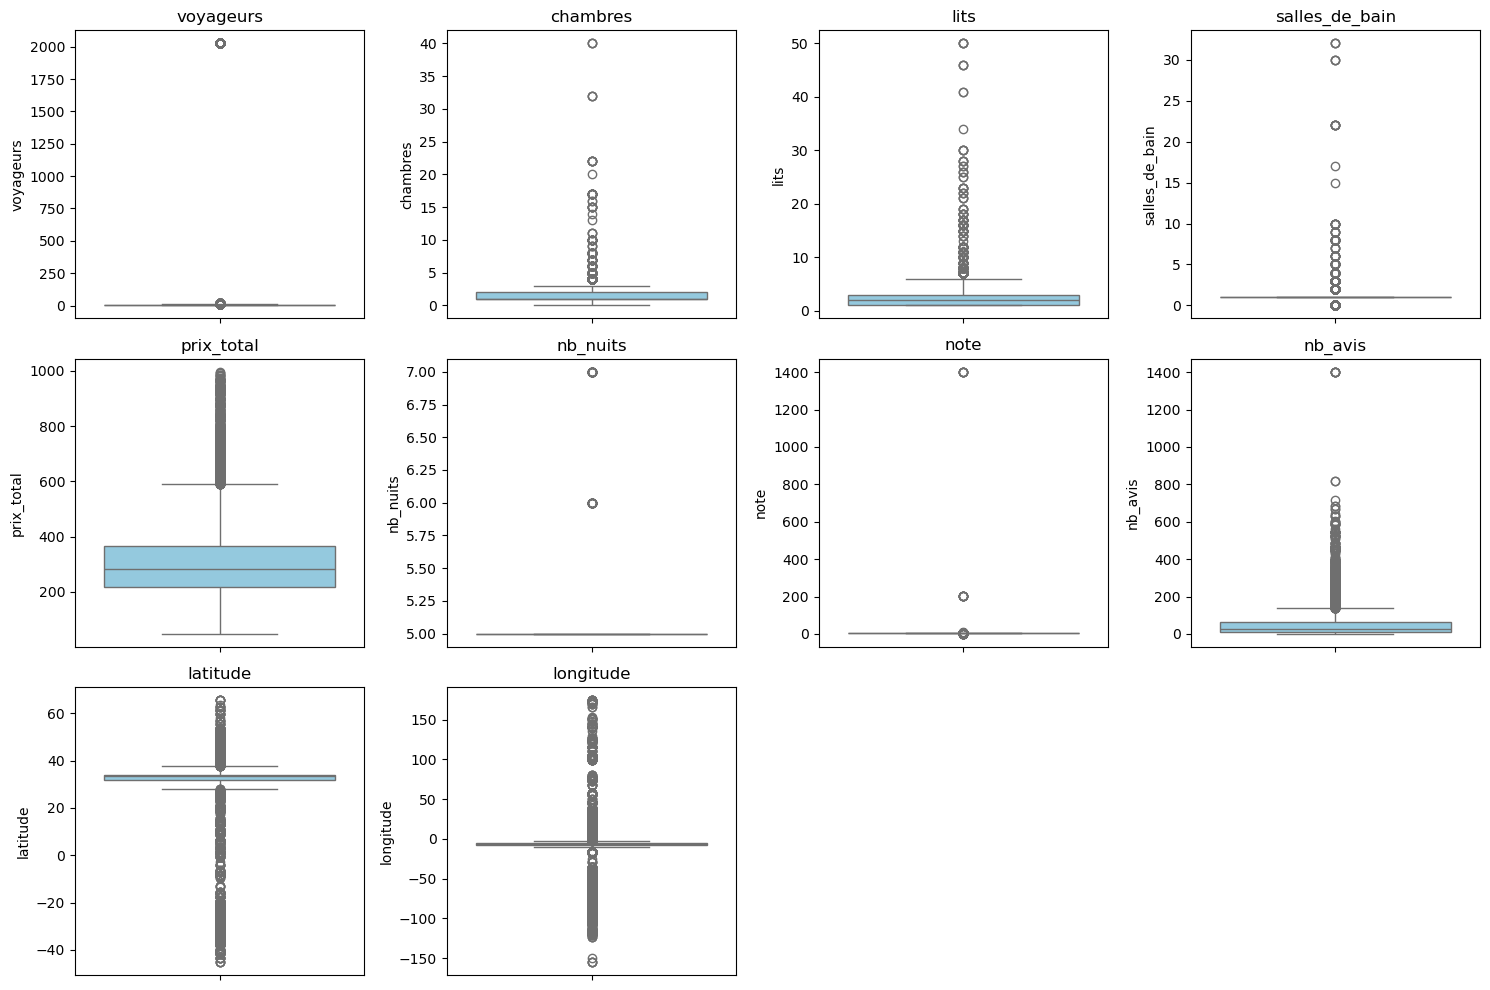

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['voyageurs', 'chambres', 'lits', 'salles_de_bain', 
                'prix_total', 'nb_nuits', 'note', 'nb_avis', 
                'latitude', 'longitude']

# Taille de la figure globale
plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 4, i)  # 2 lignes, 4 colonnes
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(col)
    plt.tight_layout()

plt.show()


In [122]:
numeric_cols = ['voyageurs', 'chambres', 'lits', 'salles_de_bain', 
                'prix_total', 'nb_nuits', 'note', 'nb_avis', 
                'latitude', 'longitude']

outliers_dict = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    outliers_dict[col] = outliers
    print(f"\nColonne: {col}")
    print("Nombre d'outliers :", outliers.shape[0])
    print("Exemples :", outliers[col].head(5))



Colonne: voyageurs
Nombre d'outliers : 572
Exemples : 170    11.0
210    10.0
335    11.0
463    11.0
567    16.0
Name: voyageurs, dtype: float64

Colonne: chambres
Nombre d'outliers : 382
Exemples : 170    4.0
172    4.0
187    4.0
210    4.0
330    4.0
Name: chambres, dtype: float64

Colonne: lits
Nombre d'outliers : 448
Exemples : 198    7.0
218    8.0
234    8.0
260    7.0
363    7.0
Name: lits, dtype: float64

Colonne: salles_de_bain
Nombre d'outliers : 4815
Exemples : 4     2.0
6     2.0
12    2.0
25    2.0
28    2.0
Name: salles_de_bain, dtype: float64

Colonne: prix_total
Nombre d'outliers : 866
Exemples : 104    641.0
140    641.0
165    883.0
171    784.0
183    820.0
Name: prix_total, dtype: float64

Colonne: nb_nuits
Nombre d'outliers : 47
Exemples : 115    6.0
377    6.0
393    6.0
740    7.0
742    7.0
Name: nb_nuits, dtype: float64

Colonne: note
Nombre d'outliers : 706
Exemples : 38     4.40
98     4.48
113    4.45
136    4.45
168    4.50
Name: note, dtype: float64

Co

In [123]:
# Sélectionner les colonnes numériques
num_cols = df.select_dtypes(include='float64').columns

# Dictionnaire pour stocker le pourcentage d'outliers
outliers_percent = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Définir les bornes
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Compter les outliers
    outliers_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].count()
    
    # Calculer le pourcentage
    percent = (outliers_count / df[col].count()) * 100
    outliers_percent[col] = percent

# Afficher le pourcentage d'outliers pour chaque colonne numérique
for col, pct in outliers_percent.items():
    print(f"{col}: {pct:.2f}%")


voyageurs: 2.81%
chambres: 1.91%
lits: 2.17%
salles_de_bain: 24.31%
prix_total: 3.72%
nb_nuits: 0.34%
note: 3.67%
nb_avis: 7.46%
latitude: 9.14%
longitude: 10.04%


## 1.7 Analyse univariée


--- Analyse de voyageurs ---
Moyenne : 27.481105221829605
Médiane : 4.0
Écart-type : 216.35135530794193


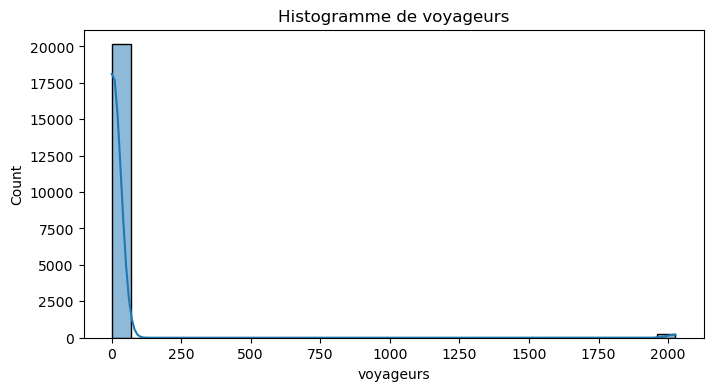


--- Analyse de chambres ---
Moyenne : 1.6328393953001048
Médiane : 1.0
Écart-type : 1.1986392742065337


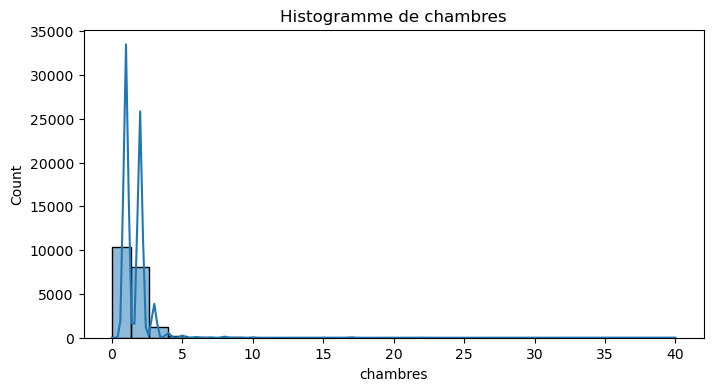


--- Analyse de lits ---
Moyenne : 2.3836657629744384
Médiane : 2.0
Écart-type : 2.081427000912406


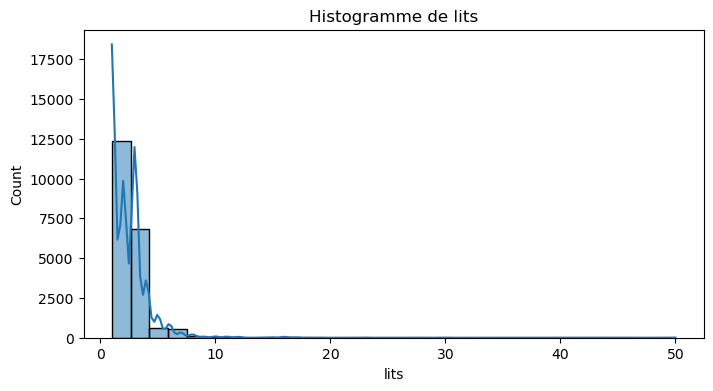


--- Analyse de salles_de_bain ---
Moyenne : 1.290814523052063
Médiane : 1.0
Écart-type : 0.9107811087993656


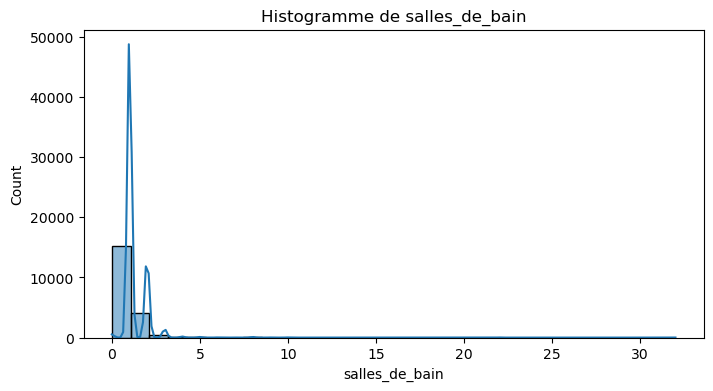


--- Analyse de prix_total ---
Moyenne : 306.7566103443828
Médiane : 284.0
Écart-type : 133.5225989322551


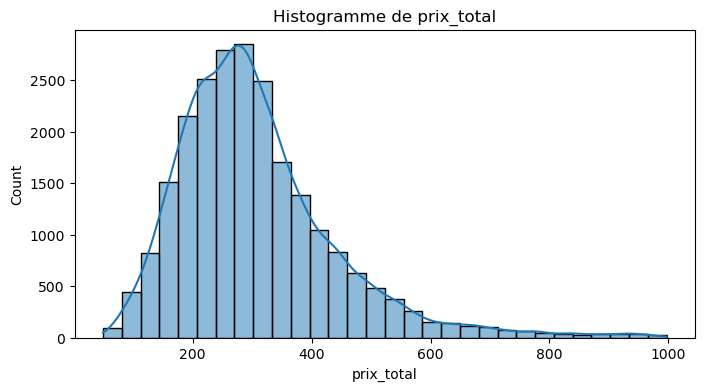


--- Analyse de nb_nuits ---
Moyenne : 5.005279366476023
Médiane : 5.0
Écart-type : 0.09443715063903768


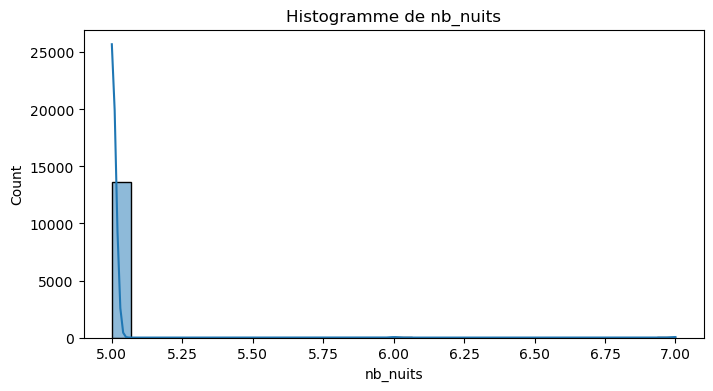


--- Analyse de note ---
Moyenne : 5.385041043225271
Médiane : 4.91
Écart-type : 24.99504358657985


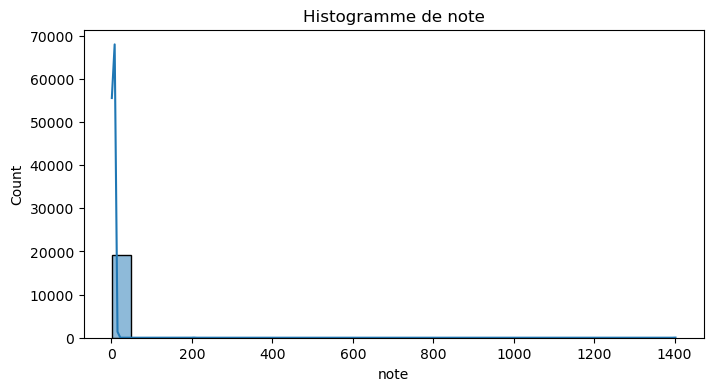


--- Analyse de nb_avis ---
Moyenne : 49.182502987168164
Médiane : 27.0
Écart-type : 67.8846678645397


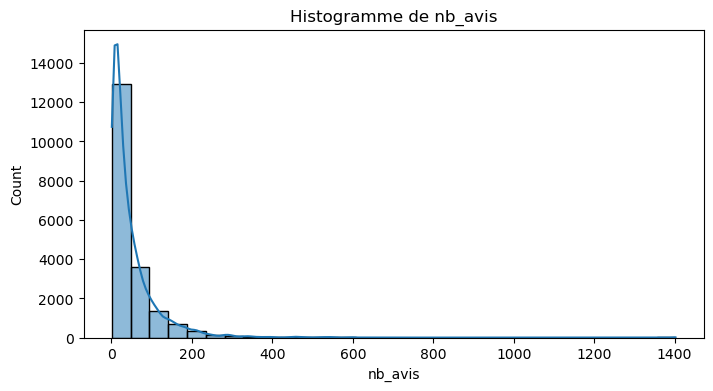


--- Analyse de latitude ---
Moyenne : 31.39522379026389
Médiane : 33.613910000000004
Écart-type : 10.793495001405088


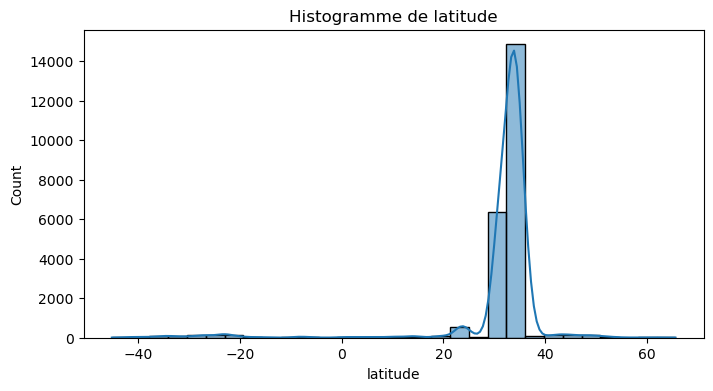


--- Analyse de longitude ---
Moyenne : -8.409402866099692
Médiane : -6.95070173290755
Écart-type : 18.958747781415052


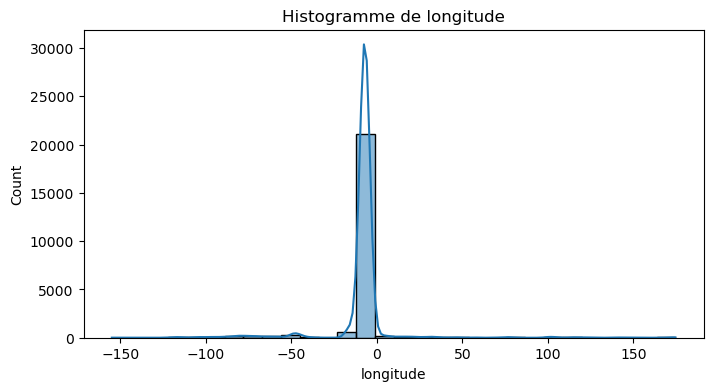

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['voyageurs', 'chambres', 'lits', 'salles_de_bain', 
                'prix_total', 'nb_nuits', 'note', 'nb_avis', 
                'latitude', 'longitude']

for col in numeric_cols:
    print(f"\n--- Analyse de {col} ---")
    print("Moyenne :", df[col].mean())
    print("Médiane :", df[col].median())
    print("Écart-type :", df[col].std())

    # Histogramme
    plt.figure(figsize=(8,4))
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f'Histogramme de {col}')
    plt.show()



Colonne: Cuisine
Cuisine
1    58.275465
0    41.724535
Name: proportion, dtype: float64


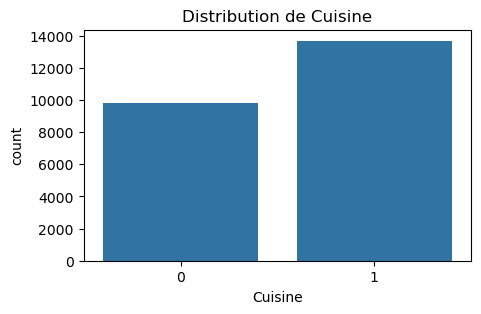


Colonne: Wifi
Wifi
1    57.56827
0    42.43173
Name: proportion, dtype: float64


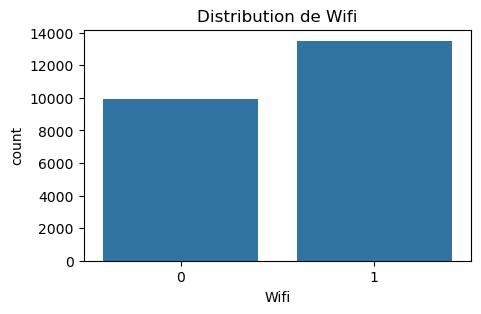


Colonne: Eau chaude
Eau chaude
1    52.008691
0    47.991309
Name: proportion, dtype: float64


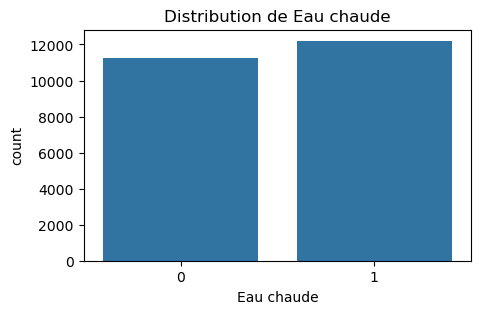


Colonne: Équipements de cuisine de base
Équipements de cuisine de base
0    53.542368
1    46.457632
Name: proportion, dtype: float64


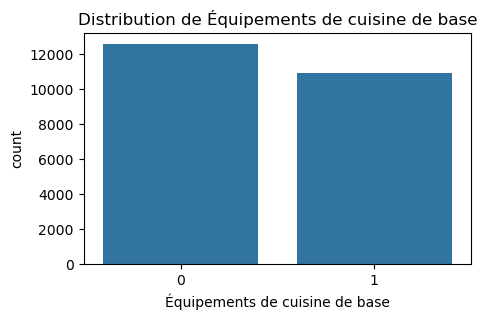


Colonne: Draps
Draps
0    53.738338
1    46.261662
Name: proportion, dtype: float64


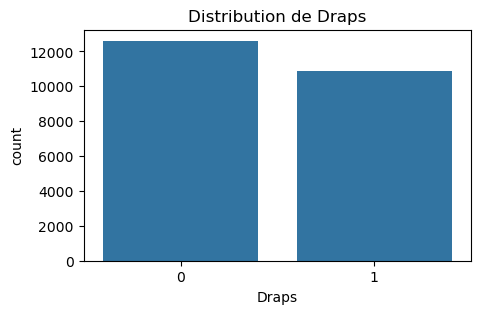

In [126]:
# Colonnes binaires (services)
binary_cols = ['Cuisine', 'Wifi', 'Eau chaude', 'Équipements de cuisine de base', 'Draps']

for col in binary_cols:
    print(f"\nColonne: {col}")
    freq = df[col].value_counts(normalize=True) * 100  # pourcentage
    print(freq)
    
    # Visualisation
    plt.figure(figsize=(5,3))
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution de {col}")
    plt.show()



Colonne: host_verified
host_verified
Oui    99.207855
Non     0.792145
Name: proportion, dtype: float64


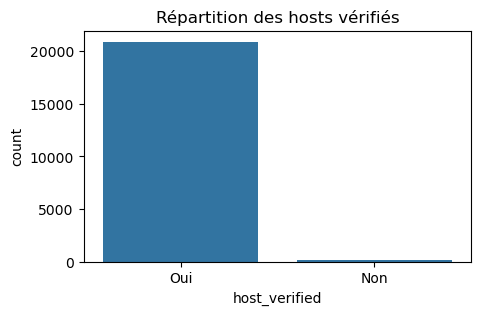

In [127]:
# Host vérifié
print("\nColonne: host_verified")
freq = df['host_verified'].value_counts(normalize=True) * 100
print(freq)

plt.figure(figsize=(5,3))
sns.countplot(x='host_verified', data=df)
plt.title("Répartition des hosts vérifiés")
plt.show()


In [128]:
# Créer une nouvelle colonne normalisée
df['type_logement_clean'] = df['type_logement']

# Tout ce qui contient 'chambre' devient 'Chambre'
df.loc[df['type_logement'].str.contains('chambre', case=False, na=False), 'type_logement_clean'] = 'Chambre'

# Vérifier
print(df['type_logement_clean'].value_counts())


type_logement_clean
Appartement                                 17074
Appartement en résidence                     2345
Hébergement                                  1334
Chambre                                      1030
Maison d'hôtes                                249
                                            ...  
Hébergement · Marrakech, Maroc                  1
Hébergement · El Sunzal Beach, Salvador         1
Hébergement · La Ferté-Saint-Cyr, France        1
Hébergement · Ortahisar, Turquie                1
Trullo                                          1
Name: count, Length: 100, dtype: int64



Colonne: localisation
localisation
Appartement ⋅ Rabat         1815
Appartement ⋅ Tanger        1791
Appartement ⋅ Casablanca    1283
Appartement ⋅ Agadir        1234
Appartement ⋅ Meknès        1108
Appartement ⋅ Fès           1001
Appartement ⋅ Marrakech      858
Appartement ⋅ Essaouira      744
Appartement ⋅ El Maarif      672
Appartement ⋅ Guéliz         431
Name: count, dtype: int64


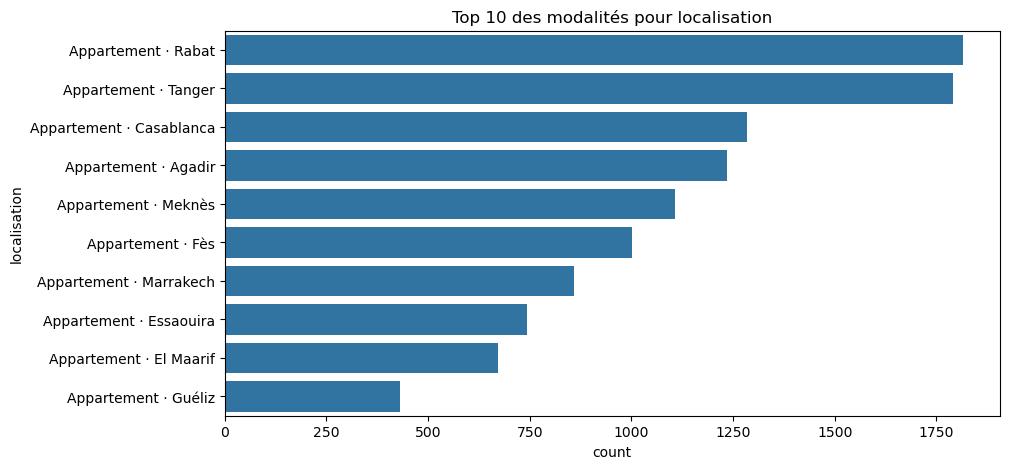


Colonne: type_logement_clean
type_logement_clean
Appartement                 17074
Appartement en résidence     2345
Hébergement                  1334
Chambre                      1030
Maison d'hôtes                249
Cabane                        216
Riad                          169
Villa                         157
Hôtel                         128
Maison de ville               125
Name: count, dtype: int64


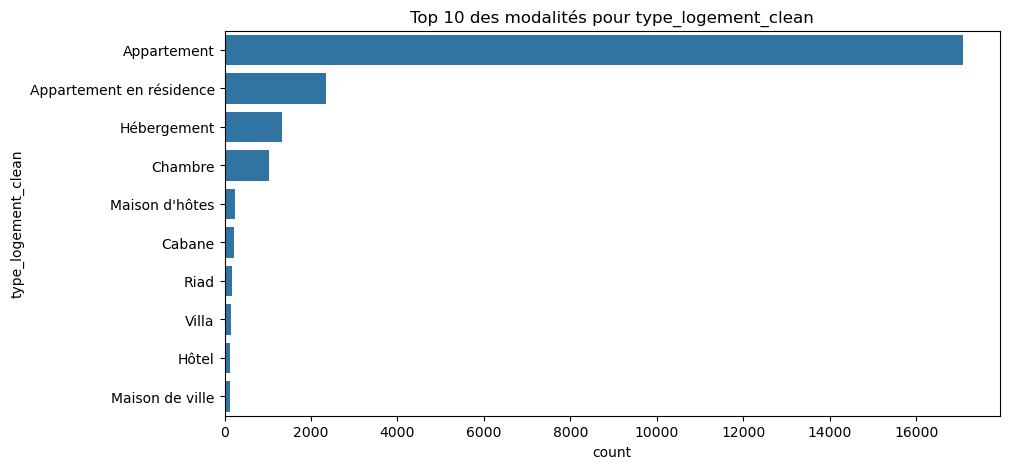


Colonne: localisation_detail
localisation_detail
Tanger        2238
Rabat         2161
Agadir        1524
Casablanca    1446
Meknès        1419
Fès           1175
Essaouira      987
Marrakech      984
El Maarif      711
El Jadida      541
Name: count, dtype: int64


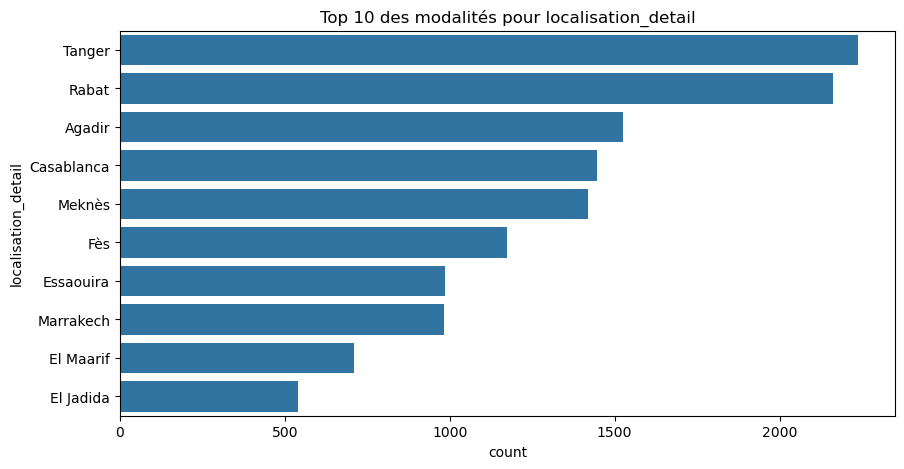

In [129]:
# Colonnes avec plusieurs catégories
multi_cat_cols = ['localisation', 'type_logement_clean', 'localisation_detail']

for col in multi_cat_cols:
    print(f"\nColonne: {col}")
    freq = df[col].value_counts().head(10)  # Top 10 catégories
    print(freq)
    
    plt.figure(figsize=(10,5))
    sns.countplot(y=col, data=df, order=freq.index)
    plt.title(f"Top 10 des modalités pour {col}")
    plt.show()


## 1.8 Quartiers → Villes

In [131]:
import pandas as pd

# Exemple : ton dataset
# df = pd.read_csv("ton_fichier.csv")  # si tu veux charger depuis un CSV

# Dictionnaire villes → liste de quartiers (tu peux ajouter toutes tes villes ici)
villes_quartiers = {
    "Casablanca": ["Anfa", "Ain Diab", "Maarif", "Gauthier", "Racine", "Bourgogne", 
                   "California", "CIL", "Oasis", "Casa Finance City", "Centre Ville",
                   "Oulfa", "Sidi Maarouf", "Ain Sebaa", "Belvedere", "Derb Omar", 
                   "Derb Ghallef", "Hay El Hanaa", "Hay Hassani", "Hubous", 
                   "Les Princesses", "Beausejour", "Dar Bouazza", 'El Maarif'],
    
    "Essaouira": ["Medina", "Mellah", "Sidi Kacem", "Plage", "Diabat", 
                  "Tagharte", "Palmeraie", "Boulevard Mohammed V", "Port"],
    
    "Bouznika": ["Plage", "Quartier Centre", "Quartier Ouest", "Quartier Est"],
    
    "Rabat": ["Agdal", "Yaacoub Al Mansour", "Hay Riad", "Souissi", "Medina",
              "Quartier Océan", "Temara", "Hassan", "Touarga", "Harhoura", 
              "Bellay Lotfi", "Diour Jdid", "Madinat Ar Riyad", "Hay Al Fath",
              "Oudaya", "Souissi Sud", "Ain Akkari", "Quartier Souissi", "Quartier Al Nahda"],

    "Marrakech": ["Medina", "Gueliz", "Hivernage", "Mellah", "Palmeraie", "Agdal",
                  "Sidi Ghanem", "Targa", "Route de Fes", "Route de Ouarzazate",
                  "Amelkis", "Menara"],

    "Tanger": ["Malabata", "Iberia", "Marchan", "Medina", "Boubana", "Mendoubia",
               "Bir Rami", "Marshan", "California", "Achakar", "City Center",
               "Parc Loti"],

    # Ajouter les autres villes ici de la même façon
    "Meknès": ["Chambre Meknès", "Hamria", "Bassatine", "Medina", "El Hedim", "Ouislane"],
    "Fès": ["El Bali", "Jdid", "Ville Nouvelle", "Batha", "Oued Fes", "Prestigia",
            "Ain Azliten", "Bab Boujloud", "Saiss"],
    "Agadir": ["Centre Ville", "Anza", "Dar Salam", "Founty", "Taddart", "Inezgane", 
               "Taghazout", "Marina", "Taroudant"],
    "El Jadida": ["Ancienne Medina", "Centre Ville", "Plage De Sidi Bouzid", "Sidi Bouzid Plage",
                  "Blad Anja", "Océan Plage", "Hay Al Fath", "Hay Sidi AbdelRahman",
                  "Route de Casablanca", "Quartier Industriel"],
    "Al Hoceima": ["Centre Ville", "Boulevard Mohammed V", "Plage Marina", "Tigre Plage",
                   "Ain Hamra", "Sidi Bouali", "Targuist Road", "Hay Sidi Ahmed",
                   "Quartier Riah", "Ain Sidi Ali", "Rte N16"],
    "Ifrane": ["Centre Ville", "Zaouia d Ifrane", "Parc National d Ifrane",
               "Akhouaynn University", "Gare", "Vallee", "Hay Salam"],
    "Dakhla": ["Centre Ville", "Al Wahda", "Al Matar", "Al Qods", "Al Massira",
               "Hay Salam", "Hay Amal", "Oum Tounsi", "Quartier Artisanal",
               "Zone Touristique", "Lagune de Dakhla", "Pointe du Dragon",
               "PK25", "PK40", "Route d Aousserd", "Route de Lagune"],
    "Safi": ["Ville Nouvelle", "Plateau", "Sidi Bouzid", "Hay Amal", "Rbat",
             "Biab", "Jnane Colon", "Sidi Abdelkrim", "Quartier Industriel",
             "Ancienne Medina", "Lalla Fatna", "Sidi Othmane", "El Bouhssaine",
             "Sidi Bouzid Plage", "Tajine", "Route de Marrakech", "Hay Salam",
             "Hay Riad", "Port de Safi", "Zone Portuaire", "Quartier des Potiers", "El Mers",
             "Sidi Bouzid Sud"]
}

# Créer dictionnaire quartier → ville
quartier_to_ville = {}
for ville, quartiers in villes_quartiers.items():
    for quartier in quartiers:
        quartier_to_ville[quartier.strip()] = ville

# Fonction pour remplacer les quartiers par la ville
def remplacer_par_ville(x):
    if pd.isna(x):
        return x
    x_clean = x.strip()
    return quartier_to_ville.get(x_clean, x_clean)  # si pas trouvé, garder la valeur

# Appliquer la fonction
df['ville_uniforme'] = df['localisation_detail'].apply(remplacer_par_ville)

# Vérifier le résultat






Colonne: localisation
localisation
Appartement ⋅ Rabat         1815
Appartement ⋅ Tanger        1791
Appartement ⋅ Casablanca    1283
Appartement ⋅ Agadir        1234
Appartement ⋅ Meknès        1108
Appartement ⋅ Fès           1001
Appartement ⋅ Marrakech      858
Appartement ⋅ Essaouira      744
Appartement ⋅ El Maarif      672
Appartement ⋅ Guéliz         431
Name: count, dtype: int64


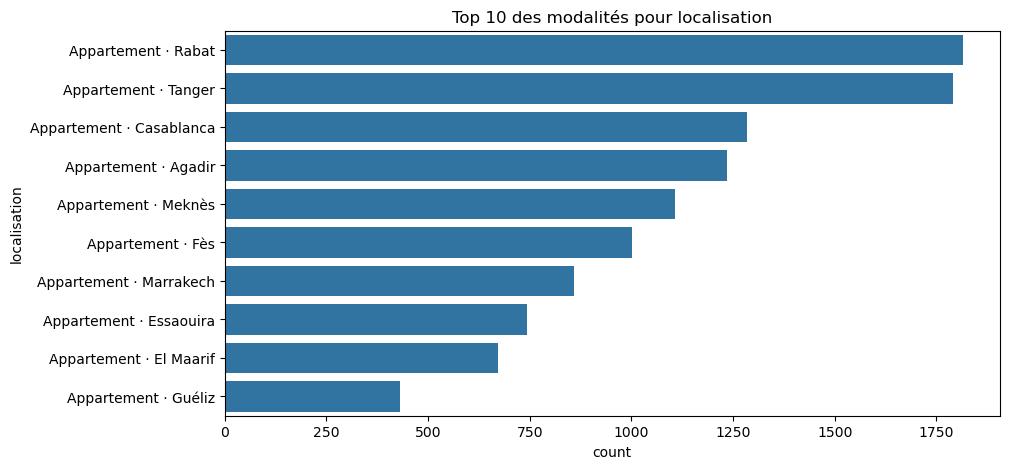


Colonne: type_logement_clean
type_logement_clean
Appartement                 17074
Appartement en résidence     2345
Hébergement                  1334
Chambre                      1030
Maison d'hôtes                249
Cabane                        216
Riad                          169
Villa                         157
Hôtel                         128
Maison de ville               125
Name: count, dtype: int64


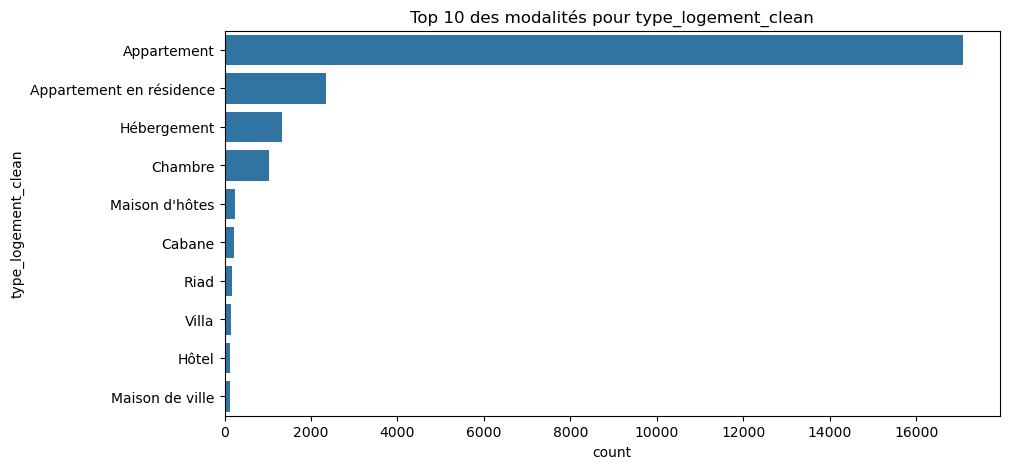


Colonne: localisation_detail
localisation_detail
Tanger        2238
Rabat         2161
Agadir        1524
Casablanca    1446
Meknès        1419
Fès           1175
Essaouira      987
Marrakech      984
El Maarif      711
El Jadida      541
Name: count, dtype: int64


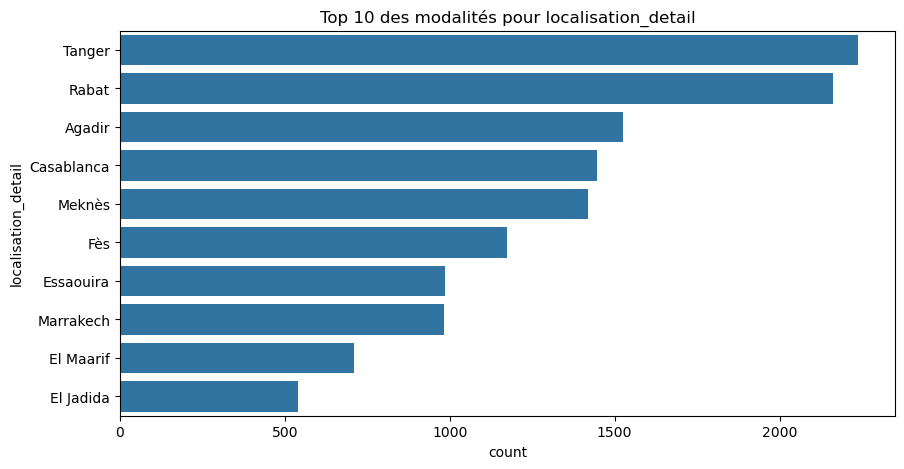


Colonne: ville_uniforme
ville_uniforme
Casablanca    2282
Tanger        2238
Rabat         2165
Agadir        1693
Meknès        1419
Fès           1175
Marrakech     1068
Essaouira      989
El Jadida      541
Dakhla         520
Name: count, dtype: int64


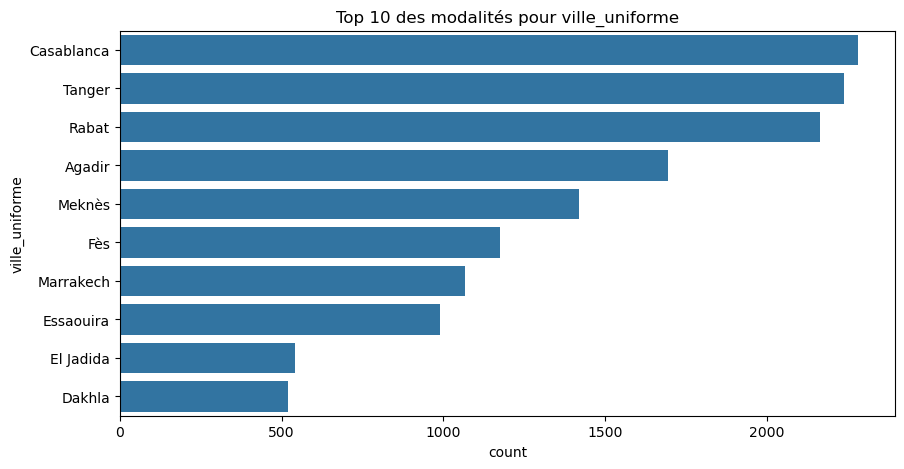

In [132]:
# Colonnes avec plusieurs catégories
multi_cat_cols = ['localisation', 'type_logement_clean', 'localisation_detail', 'ville_uniforme' ]

for col in multi_cat_cols:
    print(f"\nColonne: {col}")
    freq = df[col].value_counts().head(10)  # Top 10 catégories
    print(freq)
    
    plt.figure(figsize=(10,5))
    sns.countplot(y=col, data=df, order=freq.index)
    plt.title(f"Top 10 des modalités pour {col}")
    plt.show()


## 1.9 Analyse bivariée

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8296\1674774698.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=col_type, x='prix_total', data=data_types,
C:\Users\lenovo\AppData\Local\Temp\ipykernel_8296\1674774698.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='ville_uniforme', x='prix_total', data=data_loc,


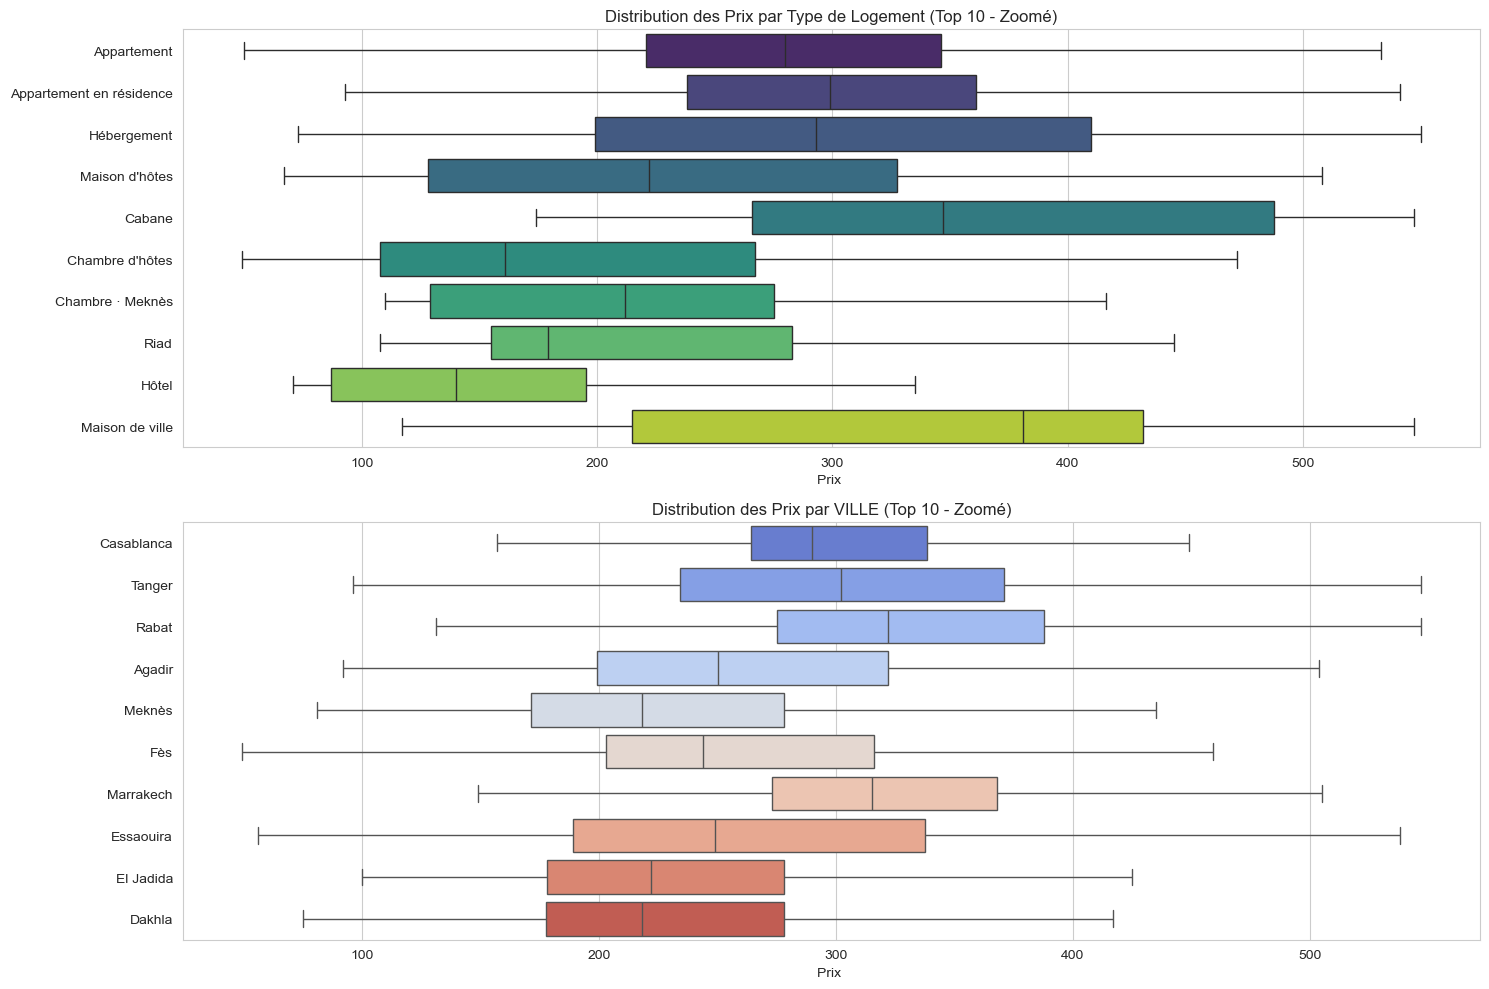

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Prepare the data (Zoom in on the 95% most common prices)
limite_prix = df['prix_total'].quantile(0.95)
df_clean_viz = df[df['prix_total'] < limite_prix].copy()

sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))

# --- CHART 1: TYPE OF HOUSE ---
plt.subplot(2, 1, 1)

# Check if you have 'type_logement_clean' or just 'type_logement'
col_type = 'type_logement' # Change this if your column is named differently

top_types = df_clean_viz[col_type].value_counts().head(10).index
data_types = df_clean_viz[df_clean_viz[col_type].isin(top_types)]

sns.boxplot(y=col_type, x='prix_total', data=data_types,
            order=top_types, palette='viridis', showfliers=False)
plt.title('Distribution des Prix par Type de Logement (Top 10 - Zoomé)')
plt.xlabel('Prix ')
plt.ylabel('')

# --- CHART 2: LOCATION (UPDATED WITH YOUR NEW COLUMN) ---
plt.subplot(2, 1, 2)

# WE USE 'ville_uniforme' HERE INSTEAD OF 'localisation'
top_loc = df_clean_viz['ville_uniforme'].value_counts().head(10).index
data_loc = df_clean_viz[df_clean_viz['ville_uniforme'].isin(top_loc)]

sns.boxplot(y='ville_uniforme', x='prix_total', data=data_loc,
            order=top_loc, palette='coolwarm', showfliers=False)
plt.title('Distribution des Prix par VILLE (Top 10 - Zoomé)')
plt.xlabel('Prix ')
plt.ylabel('')

plt.tight_layout()
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8296\1397571471.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='prix_total', data=df, palette='coolwarm')
C:\Users\lenovo\AppData\Local\Temp\ipykernel_8296\1397571471.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='prix_total', data=df, palette='coolwarm')
C:\Users\lenovo\AppData\Local\Temp\ipykernel_8296\1397571471.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='prix_total', data=df, palette='coolwarm')
C:\Users\lenovo\AppData\Local\Temp\ipykernel_8296

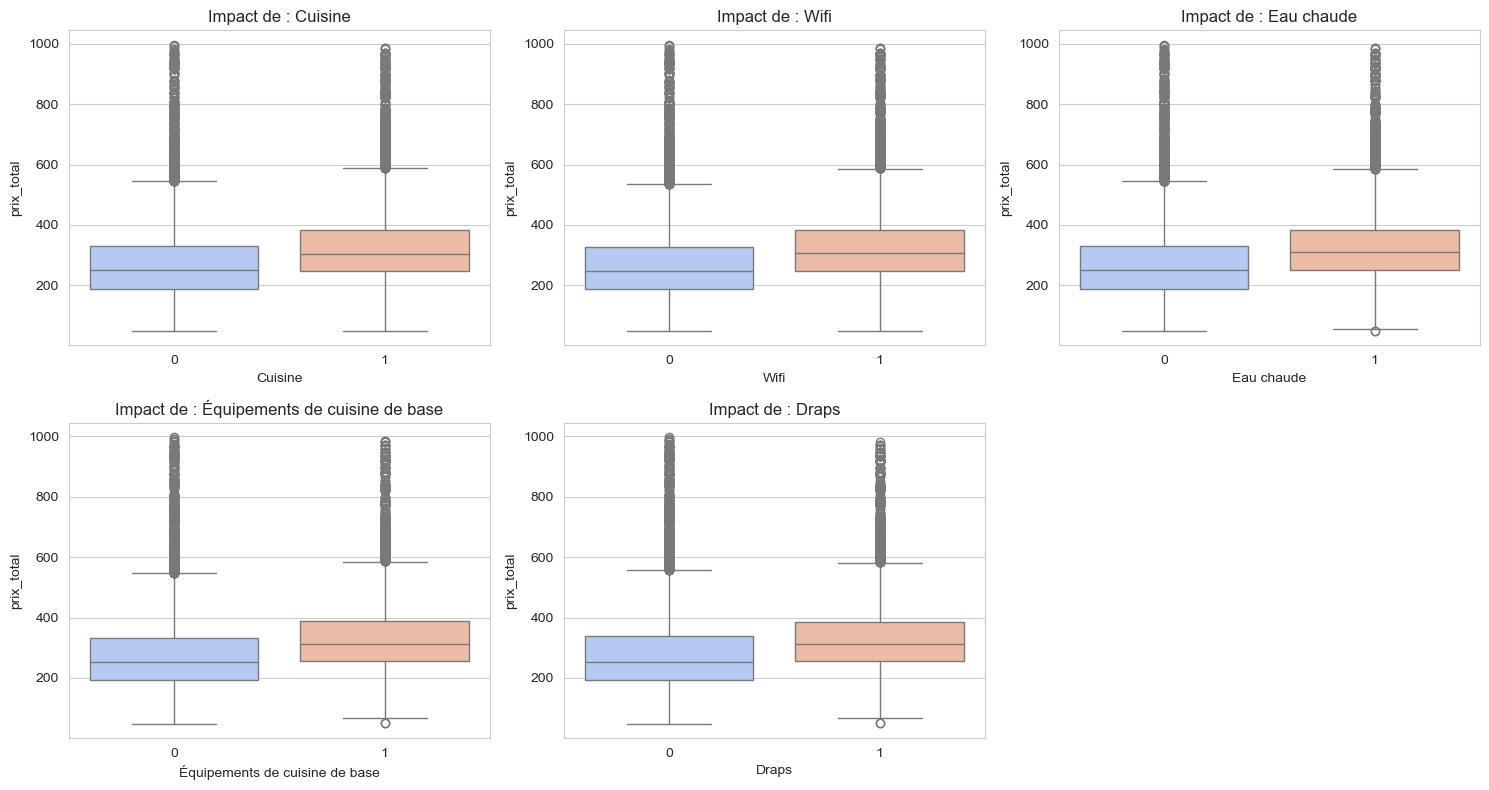

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exemple : colonnes de services (0/1) que tu as créées avant
services_cols = ['Cuisine', 'Wifi', 'Eau chaude', 'Équipements de cuisine de base', 'Draps']

plt.figure(figsize=(15,8))

for i, col in enumerate(services_cols, 1):
    plt.subplot(2, 3, i)  # 2 lignes, 3 colonnes pour les subplots
    sns.boxplot(x=col, y='prix_total', data=df, palette='coolwarm')
    plt.title(f'Impact de : {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


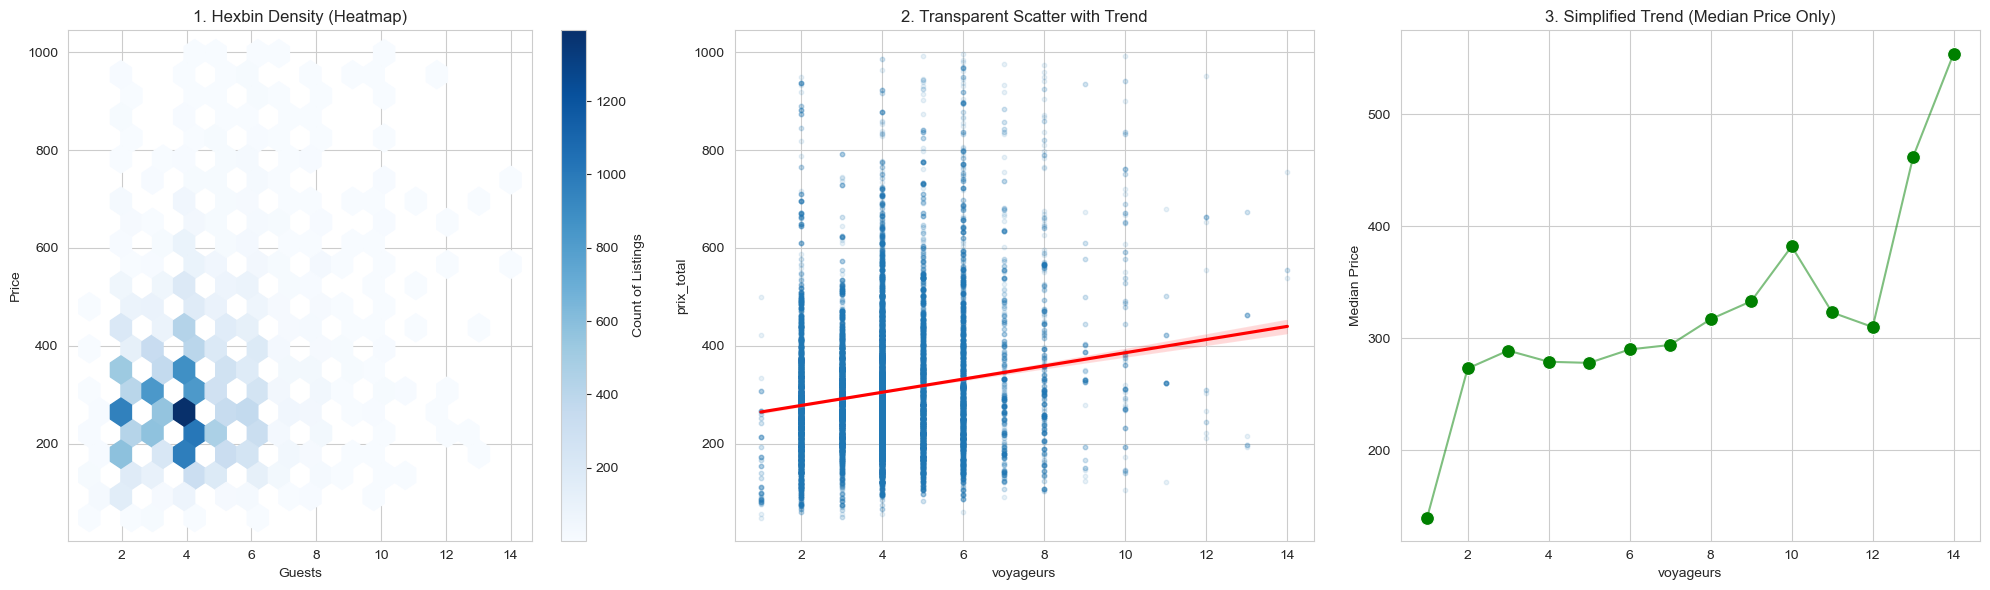

In [136]:



df_clean = df[
    (df['prix_total'] < 3000) &
    (df['voyageurs'] < 15) &
    (df['prix_total'] > 0)
]

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

hb = axes[0].hexbin(df_clean['voyageurs'], df_clean['prix_total'], gridsize=20, cmap='Blues', mincnt=1)
axes[0].set_title("1. Hexbin Density (Heatmap)")
axes[0].set_xlabel("Guests")
axes[0].set_ylabel("Price")
cb = fig.colorbar(hb, ax=axes[0])
cb.set_label('Count of Listings')


sns.regplot(
    data=df_clean,
    x='voyageurs',
    y='prix_total',
    ax=axes[1],
    scatter_kws={'alpha': 0.1, 's': 10},
    line_kws={'color': 'red'}
)
axes[1].set_title("2. Transparent Scatter with Trend")


df_agg = df_clean.groupby('voyageurs')['prix_total'].median().reset_index()
sns.scatterplot(data=df_agg, x='voyageurs', y='prix_total', s=100, color='green', ax=axes[2])
sns.lineplot(data=df_agg, x='voyageurs', y='prix_total', color='green', alpha=0.5, ax=axes[2])
axes[2].set_title("3. Simplified Trend (Median Price Only)")
axes[2].set_ylabel("Median Price")

plt.tight_layout()
plt.show()

## 1.10 Analyse multivariée

In [138]:
pip install folium

In [139]:
import folium

# Créer carte centrée sur le Maroc
carte = folium.Map(location=[31.6, -7.9], zoom_start=5)

# Ajouter les points
for idx, row in df.iterrows():
    if pd.notna(row['latitude']) and pd.notna(row['longitude']):
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=2,
            color='blue',
            fill=True,
            fill_opacity=0.6,
            popup=row['ville_uniforme']
        ).add_to(carte)

# Sauvegarder la carte en HTML
carte.save("carte_geographique.html")


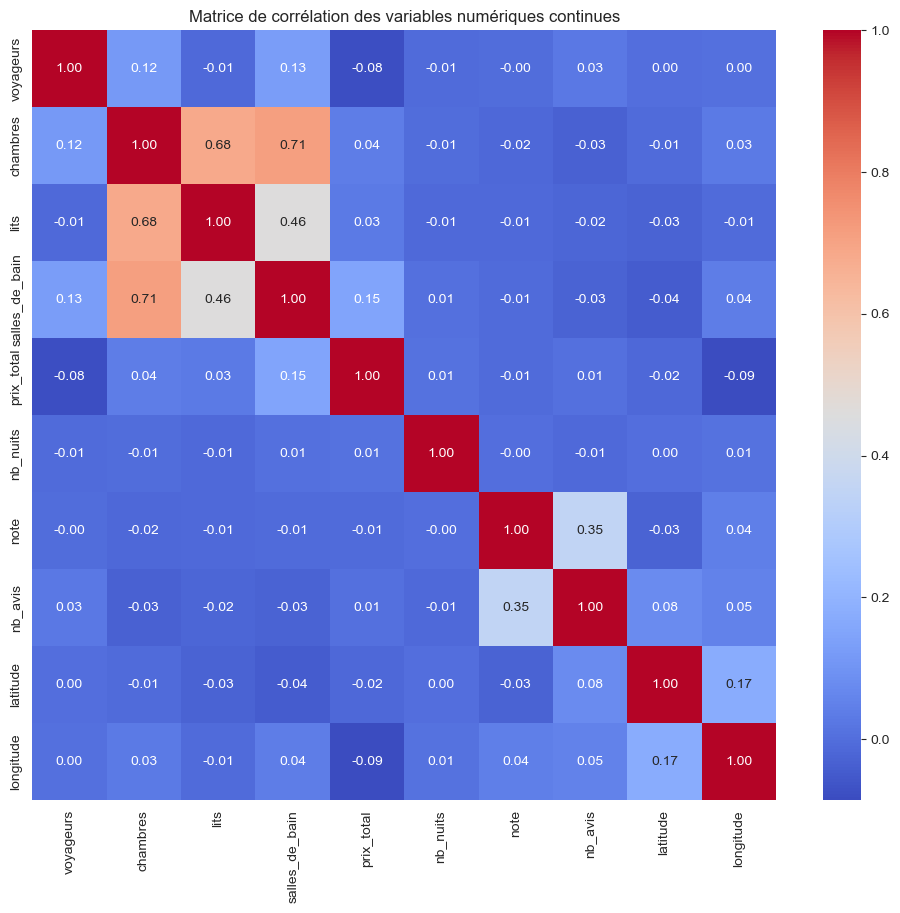

In [140]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ Sélectionner seulement les colonnes numériques continues
numeriques = ['voyageurs', 'chambres', 'lits', 'salles_de_bain', 'prix_total',
              'nb_nuits', 'note', 'nb_avis', 'latitude', 'longitude']

df_numeriques = df[numeriques]

# 2️⃣ Calculer la matrice de corrélation
corr = df_numeriques.corr()

# 3️⃣ Afficher la matrice de corrélation
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Matrice de corrélation des variables numériques continues")
plt.show()

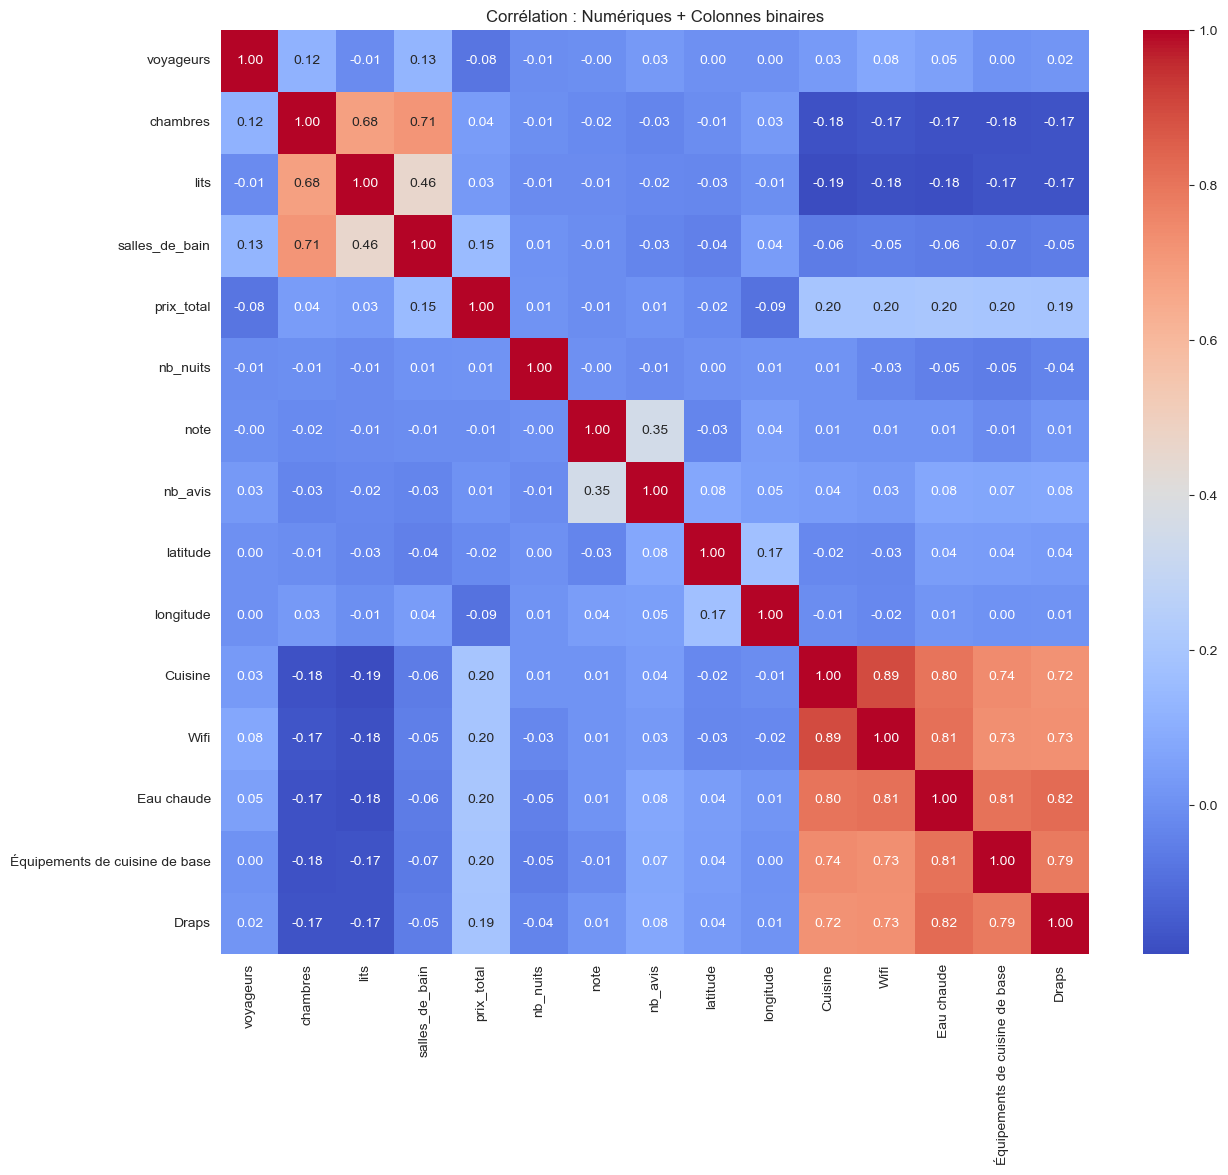

In [141]:
# 5️⃣ Option : corrélation entre variables binaires (0/1) et numériques
binaires = ['Cuisine', 'Wifi', 'Eau chaude', 'Équipements de cuisine de base', 'Draps']
df_binaires_corr = df[numeriques + binaires].corr()
plt.figure(figsize=(14,12))
sns.heatmap(df_binaires_corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Corrélation : Numériques + Colonnes binaires")
plt.show()

# 2. Nettoyage et Prétraitement des Données

In [143]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


print(f"Taille initiale: {df.shape}")
df.head()

Taille initiale: (23473, 30)


,titre,localisation,voyageurs,chambres,lits,salles_de_bain,prix_total,nb_nuits,note,nb_avis,...,Draps,Vaisselle et couverts,Télévision,Cintres,Fer à repasser,Lave-linge,type_logement,localisation_detail,type_logement_clean,ville_uniforme
0,"Cosy & Chill : AC, Netflix, piscine & plage 2 min",Appartement ⋅ Bouznika,4.0,1.0,1.0,1.0,278.0,5.0,5.00,19.0,...,1,1,1,1,0,0,Appartement,Bouznika,Appartement,Bouznika
1,Appartement cosy et lumineux à Shems Bouznika,Appartement ⋅ Bouznika,5.0,2.0,4.0,1.0,374.0,5.0,5.00,8.0,...,1,1,1,1,1,1,Appartement,Bouznika,Appartement,Bouznika
2,"Confortable appartement 2 chambres, plage à pied",Appartement ⋅ Bouznika,4.0,2.0,3.0,1.0,212.0,5.0,4.83,6.0,...,1,1,1,1,0,1,Appartement,Bouznika,Appartement,Bouznika
3,un lieu de confort a Bouznika,Appartement ⋅ Bouznika,5.0,1.0,1.0,1.0,187.0,NaN,4.92,24.0,...,1,0,1,0,0,1,Appartement,Bouznika,Appartement,Bouznika
4,"Appart moderne, Piscine & Plage a pied",Appartement ⋅ Bouznika,6.0,2.0,3.0,2.0,252.0,5.0,5.00,10.0,...,1,1,1,1,1,1,Appartement,Bouznika,Appartement,Bouznika


In [144]:
df.columns

Index(['titre', 'localisation', 'voyageurs', 'chambres', 'lits',
       'salles_de_bain', 'prix_total', 'nb_nuits', 'note', 'nb_avis',
       'amenities', 'latitude', 'longitude', 'host_verified', 'lien',
       'amenities_list', 'Cuisine', 'Wifi', 'Eau chaude',
       'Équipements de cuisine de base', 'Draps', 'Vaisselle et couverts',
       'Télévision', 'Cintres', 'Fer à repasser', 'Lave-linge',
       'type_logement', 'localisation_detail', 'type_logement_clean',
       'ville_uniforme'],
      dtype='object')

In [145]:
df.isnull().sum()

titre                                8
localisation                         8
voyageurs                         3097
chambres                          3430
lits                              2817
salles_de_bain                    3670
prix_total                         214
nb_nuits                          9835
note                              4225
nb_avis                           4224
amenities                         9212
latitude                            45
longitude                           45
host_verified                     2391
lien                              1030
amenities_list                       0
Cuisine                              0
Wifi                                 0
Eau chaude                           0
Équipements de cuisine de base       0
Draps                                0
Vaisselle et couverts                0
Télévision                           0
Cintres                              0
Fer à repasser                       0
Lave-linge               

## 2.3 Traitement des valeurs nulles

Imputation par RandomForest 

Certaines colonnes clés ont des valeurs manquantes : voyageurs, chambres, lits, salles_de_bain.

Principe : prédire les valeurs manquantes d’une colonne à partir des autres colonnes connues en utilisant un RandomForestRegressor.

Ordre recommandé :

    1- salles_de_bain

    2- chambres

    3- lits

    4- voyageurs

Les valeurs prédites sont arrondies pour rester cohérentes (entiers).

Avantages : capture les relations complexes entre les colonnes et respecte la logique métier (ex : voyageurs <= lits * chambres).

Résultat : plus de valeurs manquantes et dataset prêt pour le ML.

In [148]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Copier le dataframe
df_impute = df.copy()

# 1️⃣ Imputer salles_de_bain
train = df_impute[df_impute['salles_de_bain'].notna()]
test = df_impute[df_impute['salles_de_bain'].isna()]

X_train = train[['chambres']]
y_train = train['salles_de_bain']

X_test = test[['chambres']]

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
df_impute.loc[df_impute['salles_de_bain'].isna(), 'salles_de_bain'] = rf.predict(X_test).round()

# 2️⃣ Imputer chambres
train = df_impute[df_impute['chambres'].notna()]
test = df_impute[df_impute['chambres'].isna()]

X_train = train[['voyageurs', 'lits']]
y_train = train['chambres']

X_test = test[['voyageurs', 'lits']]

rf.fit(X_train, y_train)
df_impute.loc[df_impute['chambres'].isna(), 'chambres'] = rf.predict(X_test).round()

# 3️⃣ Imputer lits
train = df_impute[df_impute['lits'].notna()]
test = df_impute[df_impute['lits'].isna()]

X_train = train[['voyageurs', 'chambres']]
y_train = train['lits']

X_test = test[['voyageurs', 'chambres']]

rf.fit(X_train, y_train)
df_impute.loc[df_impute['lits'].isna(), 'lits'] = rf.predict(X_test).round()

# 4️⃣ Imputer voyageurs
train = df_impute[df_impute['voyageurs'].notna()]
test = df_impute[df_impute['voyageurs'].isna()]

X_train = train[['chambres', 'lits', 'salles_de_bain']]
y_train = train['voyageurs']

X_test = test[['chambres', 'lits', 'salles_de_bain']]

rf.fit(X_train, y_train)
df_impute.loc[df_impute['voyageurs'].isna(), 'voyageurs'] = rf.predict(X_test).round()

# Vérifier les valeurs manquantes
print(df_impute[['voyageurs', 'chambres', 'lits', 'salles_de_bain']].isna().sum())


# Mettre à jour le DataFrame original avec les valeurs imputées
df[['voyageurs', 'chambres', 'lits', 'salles_de_bain']] = df_impute[['voyageurs', 'chambres', 'lits', 'salles_de_bain']]


voyageurs         0
chambres          0
lits              0
salles_de_bain    0
dtype: int64


In [149]:
df.isnull().sum()

titre                                8
localisation                         8
voyageurs                            0
chambres                             0
lits                                 0
salles_de_bain                       0
prix_total                         214
nb_nuits                          9835
note                              4225
nb_avis                           4224
amenities                         9212
latitude                            45
longitude                           45
host_verified                     2391
lien                              1030
amenities_list                       0
Cuisine                              0
Wifi                                 0
Eau chaude                           0
Équipements de cuisine de base       0
Draps                                0
Vaisselle et couverts                0
Télévision                           0
Cintres                              0
Fer à repasser                       0
Lave-linge               

 La variable nb_nuits a été fixée à 5 nuits, correspondant à la durée la plus couramment observée dans les annonces, afin de limiter l’impact des valeurs manquantes et de standardiser la durée des séjours.

In [151]:
df['nb_nuits'] = 5

 Les valeurs manquantes des variables note et nb_avis ont été remplacées par la médiane afin de représenter une valeur centrale et limiter l’influence des valeurs extrêmes.

In [153]:
median_note = df['note'].median()
df['note'] = df['note'].fillna(median_note)

In [154]:
median_nb_avis = df['nb_avis'].median()
df['nb_avis'] = df['nb_avis'].fillna(median_nb_avis)

Les observations contenant des valeurs manquantes pour les variables prix_total, latitude, longitude, amenities et localisation_detail ont été supprimées, car ces variables sont essentielles à l’analyse et ne peuvent pas être imputées de manière fiable sans introduire de biais. Cette étape permet de garantir la cohérence et la qualité des données utilisées pour la modélisation.

In [156]:
df = df.dropna(subset=["prix_total", "latitude", "longitude", "amenities", "localisation_detail"])

In [157]:
df.isnull().sum()

titre                                0
localisation                         0
voyageurs                            0
chambres                             0
lits                                 0
salles_de_bain                       0
prix_total                           0
nb_nuits                             0
note                                 0
nb_avis                              0
amenities                            0
latitude                             0
longitude                            0
host_verified                     2383
lien                                60
amenities_list                       0
Cuisine                              0
Wifi                                 0
Eau chaude                           0
Équipements de cuisine de base       0
Draps                                0
Vaisselle et couverts                0
Télévision                           0
Cintres                              0
Fer à repasser                       0
Lave-linge               

## 2.5 Supprimer les colonnes inutiles
Suppression de "lien", "titre", "localisation", "amenities", "type_logement", "host_verified", "ville_uniforme", "amenities_list".

In [159]:
df.drop(columns=["lien", "titre", "localisation", "amenities", "type_logement", "host_verified", "ville_uniforme", "amenities_list"], inplace=True)

In [160]:
df.shape

(13726, 22)

In [161]:
df.columns

Index(['voyageurs', 'chambres', 'lits', 'salles_de_bain', 'prix_total',
       'nb_nuits', 'note', 'nb_avis', 'latitude', 'longitude', 'Cuisine',
       'Wifi', 'Eau chaude', 'Équipements de cuisine de base', 'Draps',
       'Vaisselle et couverts', 'Télévision', 'Cintres', 'Fer à repasser',
       'Lave-linge', 'localisation_detail', 'type_logement_clean'],
      dtype='object')

In [162]:
df.isnull().sum()

voyageurs                         0
chambres                          0
lits                              0
salles_de_bain                    0
prix_total                        0
nb_nuits                          0
note                              0
nb_avis                           0
latitude                          0
longitude                         0
Cuisine                           0
Wifi                              0
Eau chaude                        0
Équipements de cuisine de base    0
Draps                             0
Vaisselle et couverts             0
Télévision                        0
Cintres                           0
Fer à repasser                    0
Lave-linge                        0
localisation_detail               0
type_logement_clean               0
dtype: int64

## 2.6 Feature Engineering

In [164]:
# Création prix-par-nuit
df = df[df['nb_nuits'] > 0] # Sécurité
df['prix_par_nuit'] = df['prix_total'] / df['nb_nuits']

print("Colonne 'prix_par_nuit' créée.")

Colonne 'prix_par_nuit' créée.


## 2.7 Gestion des Outliers

In [166]:
# Colonnes à examiner
cols = ["voyageurs", "chambres", "lits", "nb_nuits", "prix_par_nuit"]

# Afficher min et max
min_values = df[cols].min()
max_values = df[cols].max()

print("Minimums :")
print(min_values)
print("\nMaximums :")
print(max_values)


Minimums :
voyageurs         1.0
chambres          1.0
lits              1.0
nb_nuits          5.0
prix_par_nuit    10.0
dtype: float64

Maximums :
voyageurs        2026.0
chambres           40.0
lits               50.0
nb_nuits            5.0
prix_par_nuit     197.0
dtype: float64


In [167]:
# Compter l'occurrence de chaque valeur distincte
occurrences = df["voyageurs"].value_counts()

print("Occurrences de chaque valeur distincte :")
print(occurrences)


Occurrences de chaque valeur distincte :
voyageurs
4.0       4250
2.0       2746
3.0       2531
6.0       2434
5.0       1333
7.0        155
8.0        132
10.0        39
1.0         32
9.0         26
16.0        15
13.0         8
12.0         8
2026.0       7
15.0         4
11.0         3
14.0         3
Name: count, dtype: int64


In [168]:
# Compter l'occurrence de chaque valeur distincte
occurrences = df["nb_nuits"].value_counts()

print("Occurrences de chaque valeur distincte :")
print(occurrences)

Occurrences de chaque valeur distincte :
nb_nuits
5    13726
Name: count, dtype: int64


In [169]:
# Compter l'occurrence de chaque valeur distincte
occurrences = df["chambres"].value_counts()

print("Occurrences de chaque valeur distincte :")
print(occurrences)

Occurrences de chaque valeur distincte :
chambres
1.0     7513
2.0     4188
3.0     1933
4.0       49
5.0       16
8.0        6
7.0        5
17.0       5
22.0       4
40.0       3
10.0       1
6.0        1
15.0       1
11.0       1
Name: count, dtype: int64


In [170]:
# Compter l'occurrence de chaque valeur distincte
occurrences = df["lits"].value_counts()

print("Occurrences de chaque valeur distincte :")
print(occurrences)

Occurrences de chaque valeur distincte :
lits
1.0     5678
3.0     4140
2.0     2665
4.0      734
5.0      282
6.0      105
7.0       50
8.0       26
11.0      13
10.0       7
12.0       6
30.0       4
17.0       3
9.0        3
23.0       3
50.0       3
21.0       2
34.0       1
22.0       1
Name: count, dtype: int64


In [171]:
# Copie du dataset
df_clean = df.copy()

# Selon les boxplots
# prix-par-nuit: on garde, disons, entre 10€ et 200€
# nb-nuits: on garde < 7
# voyageurs: on garde < 8
# chambres: on garde < 3
# lits: on garde < 6
# Coordonnées Maroc: Latitude [20, 36], Longitude [-18, -1]

initial_len = len(df_clean)

# Définition des filtres
mask = (
    (df_clean['prix_par_nuit'] > 10) & (df_clean['prix_par_nuit'] < 200) &
    (df_clean['nb_nuits'] <= 5) &
    (df_clean['voyageurs'] <= 8) &
    (df_clean['chambres'] <= 3) &
    (df_clean['lits'] <= 6) &
    (df_clean['latitude'].between(20, 36)) &
    (df_clean['longitude'].between(-18, -1))
)

df_clean = df_clean[mask]
print(f"Lignes supprimées comme outliers: {initial_len - len(df_clean)}")
print(f"Taille finale du dataset: {df_clean.shape}")

Lignes supprimées comme outliers: 1361
Taille finale du dataset: (12365, 23)


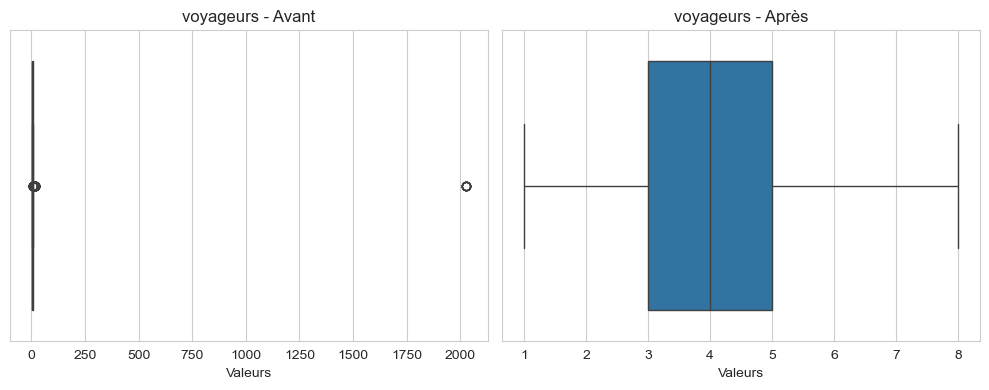

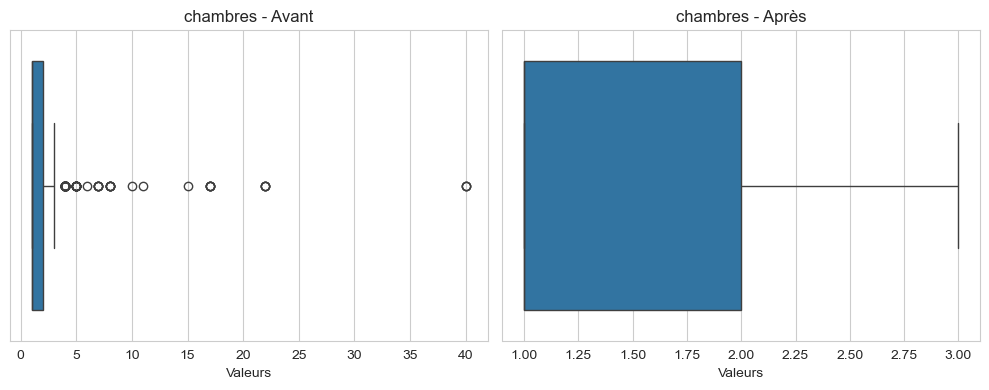

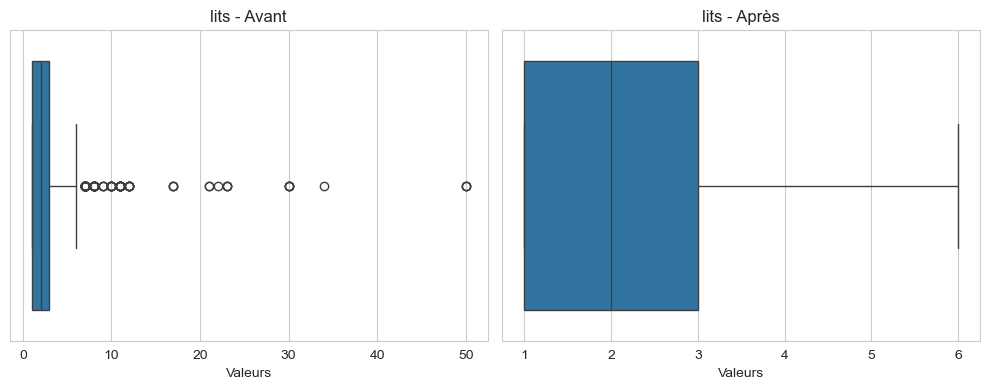

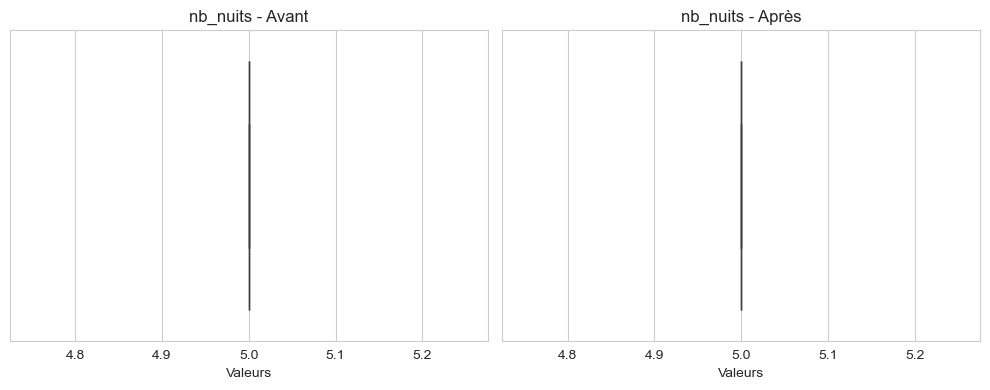

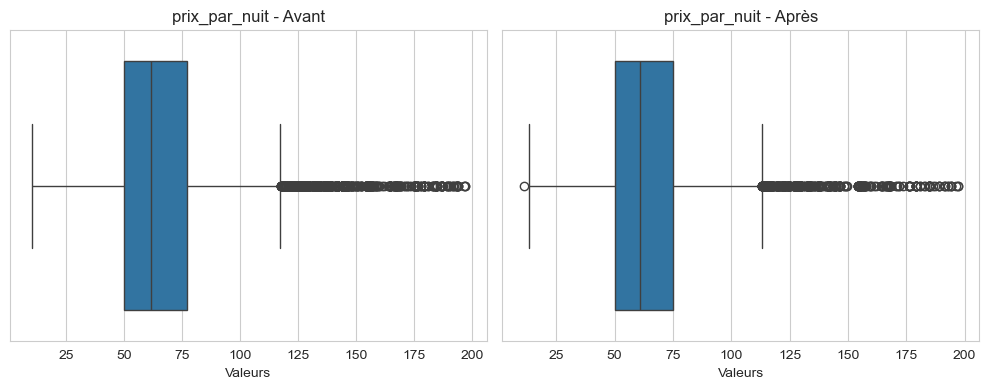

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ["voyageurs", "chambres", "lits", "nb_nuits", "prix_par_nuit"]

# Fonction pour afficher avant/après
def plot_before_after(df_before, df_after, cols):
    for col in cols:
        plt.figure(figsize=(10,4))

        # Boxplot avant
        plt.subplot(1,2,1)
        sns.boxplot(x=df_before[col])
        plt.title(f"{col} - Avant")
        plt.xlabel("Valeurs")
        
        # Boxplot après
        plt.subplot(1,2,2)
        sns.boxplot(x=df_after[col])
        plt.title(f"{col} - Après")
        plt.xlabel("Valeurs")
        
        plt.tight_layout()
        plt.show()

# Appel de la fonction
plot_before_after(df, df_clean, cols)


In [173]:
# Nom du fichier de sortie
output_file = "data_finale.csv"

# Sauvegarde du DataFrame complet avec les valeurs imputées
df.to_csv(output_file, index=False)

print(f"Dataset final sauvegardé sous : {output_file}")


Dataset final sauvegardé sous : data_finale.csv


# correlation & Anova

In [3]:
import pandas as pd

df_check = pd.read_csv("data_finale.csv")
df_check.head()


,voyageurs,chambres,lits,salles_de_bain,prix_total,nb_nuits,note,nb_avis,latitude,longitude,...,Équipements de cuisine de base,Draps,Vaisselle et couverts,Télévision,Cintres,Fer à repasser,Lave-linge,localisation_detail,type_logement_clean,prix_par_nuit
0,4.0,1.0,1.0,1.0,278.0,5,5.00,19.0,33.814263,-7.143945,...,1,1,1,1,1,0,0,Bouznika,Appartement,55.6
1,5.0,2.0,4.0,1.0,374.0,5,5.00,8.0,33.792200,-7.163300,...,1,1,1,1,1,1,1,Bouznika,Appartement,74.8
2,4.0,2.0,3.0,1.0,212.0,5,4.83,6.0,33.804800,-7.175800,...,1,1,1,1,1,0,1,Bouznika,Appartement,42.4
3,5.0,1.0,1.0,1.0,187.0,5,4.92,24.0,33.773400,-7.159900,...,1,1,0,1,0,0,1,Bouznika,Appartement,37.4
4,6.0,2.0,3.0,2.0,252.0,5,5.00,10.0,33.822800,-7.128300,...,1,1,1,1,1,1,1,Bouznika,Appartement,50.4


In [14]:
df = df_check

In [16]:
import pandas as pd

# Sélectionner seulement les variables numériques
numeric_cols = df.select_dtypes(include=['int64','float64']).columns

# Supprimer la variable cible de la liste
numeric_cols = numeric_cols.drop('prix_par_nuit')

# Calcul correlation avec prix_par_nuit
correlation = df[numeric_cols].corrwith(df['prix_par_nuit'])

# Valeur absolue + tri
correlation_df = pd.DataFrame({
    'variable': correlation.index,
    'correlation': correlation.values,
    'correlation_abs': correlation.abs().values
}).sort_values(by='correlation_abs', ascending=False)

correlation_df


C:\Users\lenovo\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\lenovo\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,variable,correlation,correlation_abs
4,prix_total,1.000000,1.000000
3,salles_de_bain,0.153721,0.153721
18,Fer à repasser,0.149732,0.149732
1,chambres,0.129077,0.129077
15,Vaisselle et couverts,0.126951,0.126951
17,Cintres,0.106676,0.106676
2,lits,0.096420,0.096420
13,Équipements de cuisine de base,0.088851,0.088851
9,longitude,-0.085908,0.085908
14,Draps,0.080658,0.080658


In [18]:
from scipy import stats

# Liste des variables qualitatives
categorical_cols = ['type_logement_clean', 'localisation_detail']

for col in categorical_cols:
    groups = []
    
    for category in df[col].dropna().unique():
        group = df[df[col] == category]['prix_par_nuit']
        groups.append(group)
    
    f_stat, p_value = stats.f_oneway(*groups)
    
    print(f"\nVariable : {col}")
    print("F-statistic =", f_stat)
    print("p-value =", p_value)
    
    if p_value < 0.05:
        print("✅ Différence significative (influence sur le prix)")
    else:
        print("❌ Pas de différence significative")



Variable : type_logement_clean
F-statistic = 30.323864298933557
p-value = 1.1024653399260797e-139
✅ Différence significative (influence sur le prix)

Variable : localisation_detail
F-statistic = 14.879804069372334
p-value = 0.0
✅ Différence significative (influence sur le prix)


                                voyageurs  chambres      lits  salles_de_bain  \
voyageurs                        1.000000  0.071804  0.057227        0.069169   
chambres                         0.071804  1.000000  0.761280        0.615865   
lits                             0.057227  0.761280  1.000000        0.517260   
salles_de_bain                   0.069169  0.615865  0.517260        1.000000   
prix_total                      -0.025947  0.129077  0.096420        0.153721   
nb_nuits                              NaN       NaN       NaN             NaN   
note                            -0.001270 -0.013237 -0.014268       -0.006329   
nb_avis                         -0.010035 -0.011476 -0.023893       -0.036776   
latitude                         0.001238 -0.004642 -0.048767       -0.057956   
longitude                       -0.001584  0.019036 -0.024045        0.045217   
Cuisine                         -0.011489 -0.035844 -0.046873       -0.045337   
Wifi                        

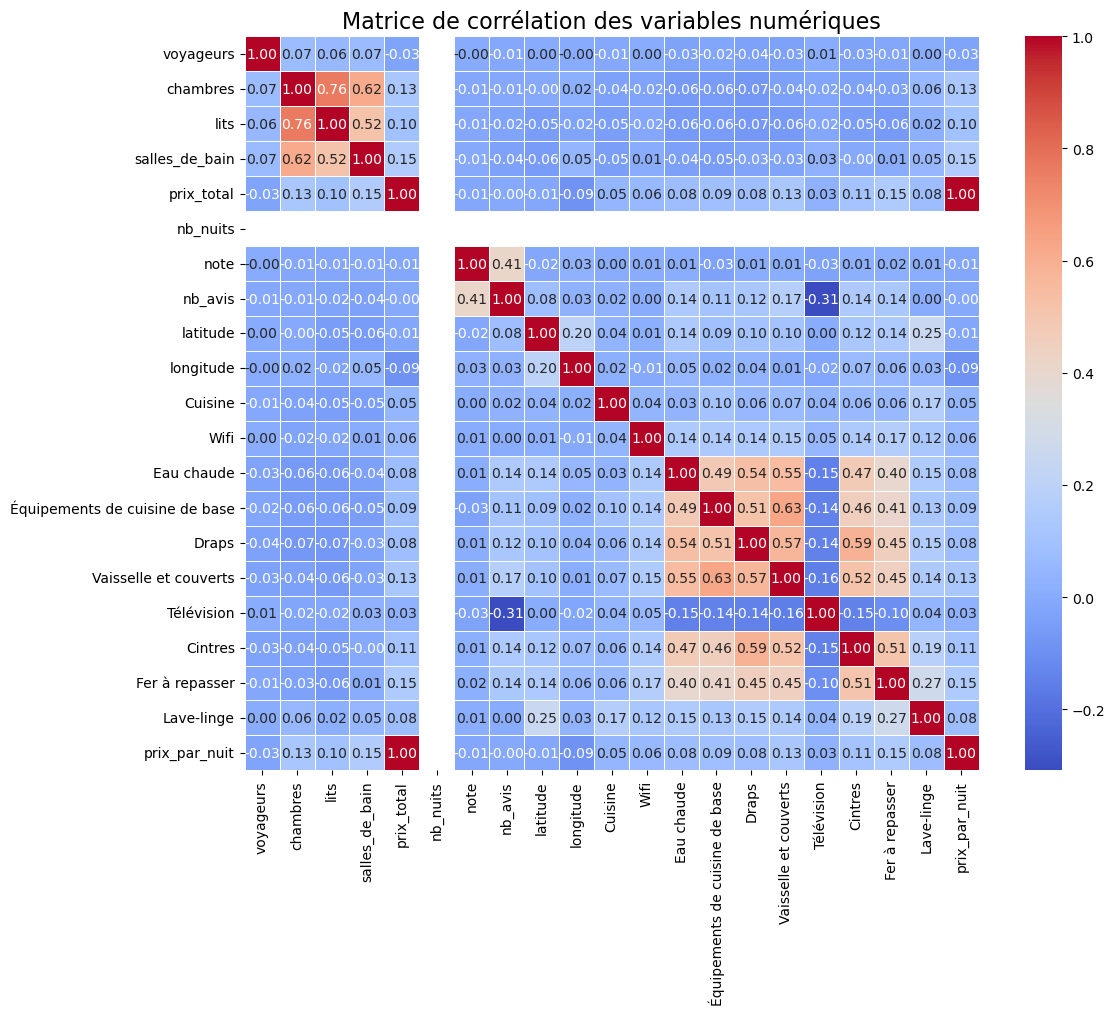

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sélection des variables numériques
df_numeric = df.select_dtypes(include=[np.number]).copy()

# Suppression des lignes avec NaN pour la corrélation
df_numeric = df_numeric.dropna()

# Calcul de la matrice de corrélation
corr_matrix = df_numeric.corr(method='pearson')

# Affichage du DataFrame (optionnel)
print(corr_matrix)
plt.figure(figsize=(12,10))
sns.heatmap(
    corr_matrix, 
    annot=True,        # affiche les valeurs
    fmt=".2f",         # format à 2 décimales
    cmap="coolwarm",   # palette rouge/bleu
    cbar=True,         # barre de couleurs
    square=True,
    linewidths=0.5
)

plt.title("Matrice de corrélation des variables numériques", fontsize=16)
plt.tight_layout()
plt.show()


In [28]:
from scipy.stats import ttest_ind

for service in services:
    group0 = df[df[service] == 0]["prix_par_nuit"]
    group1 = df[df[service] == 1]["prix_par_nuit"]
    
    stat, p_value = ttest_ind(group0, group1)
    
    print(f"{service} - p-value : {p_value}")


Wifi - p-value : 1.3934861244608487e-13
Cuisine - p-value : 5.0810671429680917e-08
Télévision - p-value : 0.0007189722381693745
Eau chaude - p-value : 1.874550118872199e-19
Fer à repasser - p-value : 1.2096875922921148e-69
Lave-linge - p-value : 8.649729122545574e-19
Draps - p-value : 2.954079555456656e-21
Vaisselle et couverts - p-value : 2.028788612866253e-50
Cintres - p-value : 4.9519094365179836e-36
Équipements de cuisine de base - p-value : 1.8222388182438095e-25


In [40]:
services = [
    "Wifi",
    "Cuisine",
    "Télévision",
    "Eau chaude",
    "Fer à repasser",
    "Lave-linge",
    "Draps",
    "Vaisselle et couverts",
    "Cintres",
    "Équipements de cuisine de base"
]


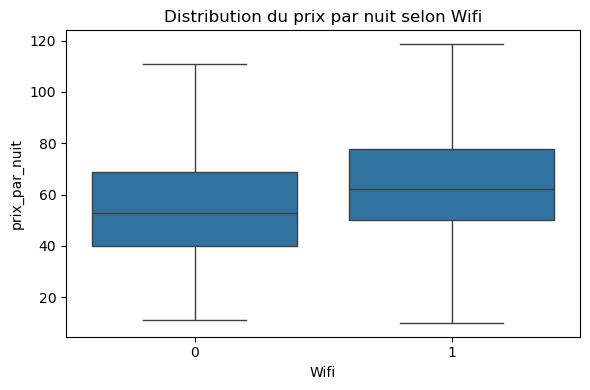

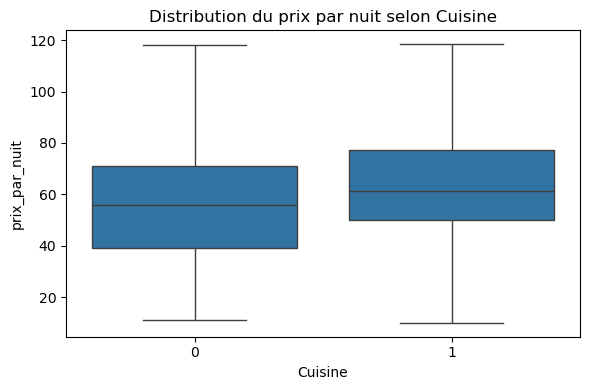

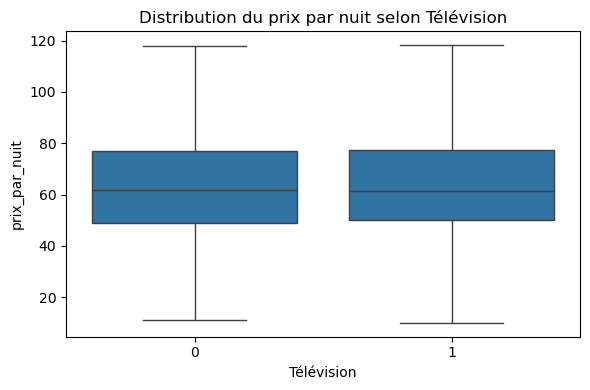

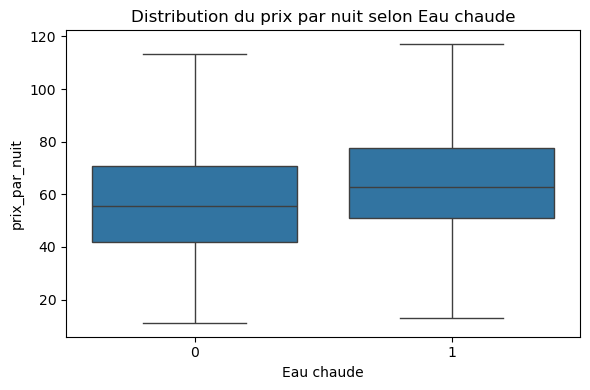

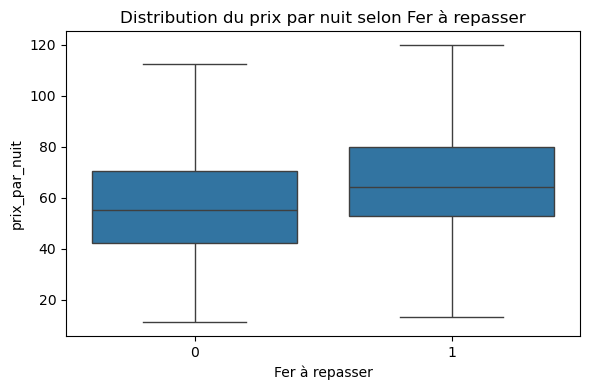

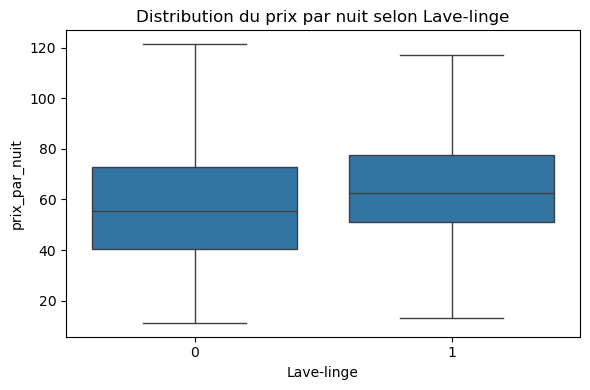

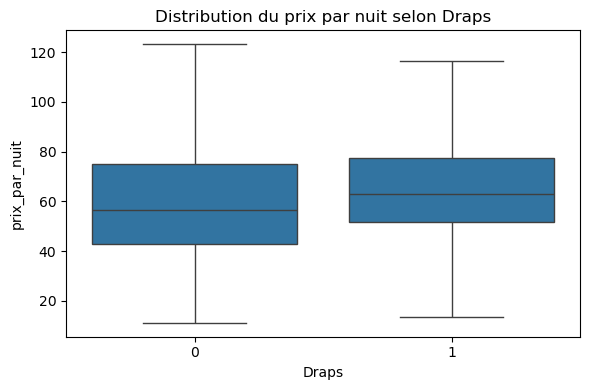

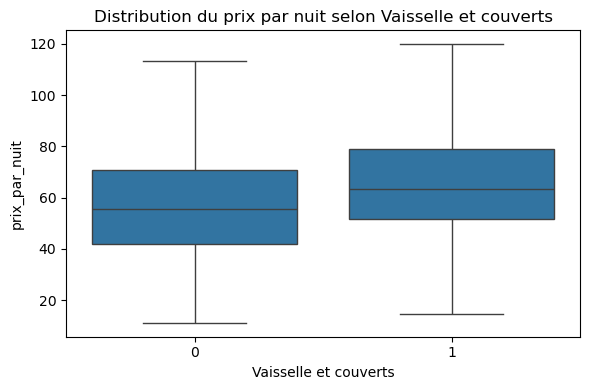

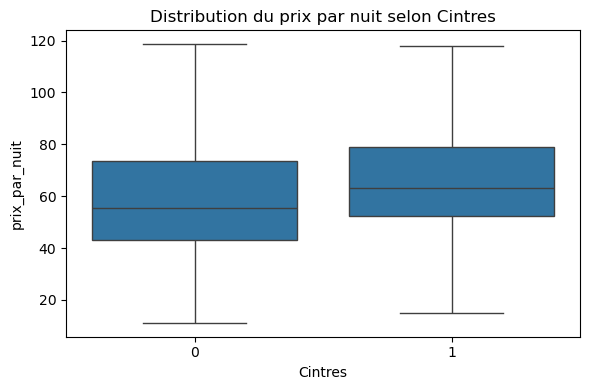

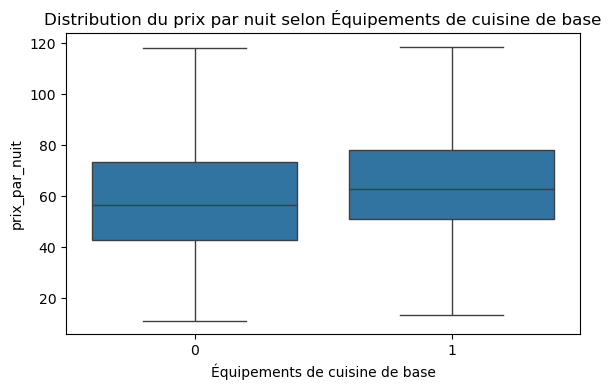

In [26]:
for service in services:
    plt.figure(figsize=(6,4))
    sns.boxplot(
        x=service,
        y="prix_par_nuit",
        data=df,
        showfliers=False  # enlève les valeurs aberrantes pour meilleure lisibilité
    )
    plt.title(f"Distribution du prix par nuit selon {service}")
    plt.tight_layout()
    plt.show()


In [240]:
print(df.groupby('type_logement_clean')['prix_par_nuit'].mean().sort_values(ascending=False))


type_logement_clean
Cottage                     130.088000
Bungalow                    113.725000
Camping-car/caravane        103.566667
Chalet                      102.287500
Villa                       100.166667
Yourte                       94.342857
Maison en terre              92.766667
Gîte à la ferme              83.746667
Cabane                       81.376712
Hébergement                  78.334807
Péniche                      76.600000
Tiny house                   71.280000
Maison de ville              70.880000
Loft                         70.304762
Appartement en résidence     66.314230
Appartement                  64.907409
Maison d'hôtes               61.111290
Suite                        60.000000
Boutique-hôtel               59.600000
Riad                         59.396825
Logement de vacances         50.177778
Chambre                      45.943333
Hôtel                        42.711111
Tente                        42.200000
Casa particular              33.400000
Gîte 

## 2.9 Préparation des features et division du dataset
Nous séparons la variable cible (`prix_par_nuit`) des variables explicatives.

In [176]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [56]:
# Dataset final avant encodage
df_final = df.copy()  # ou ton dataset déjà nettoyé

# Target
y = df_final['prix_par_nuit']

# Features
X = df_final.drop(columns=['prix_par_nuit'])

In [57]:
# Numériques (que l’on va standardiser)
num_features = X.select_dtypes(include=['int64','float64']).columns.tolist()

# Catégorielles (que l’on va encoder)/
cat_features = X.select_dtypes(include=['object','category']).columns.tolist()

In [58]:
# Pipeline de preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ]
)

In [59]:
# Appliquer le preprocessing
X_processed = preprocessor.fit_transform(X)

In [60]:
# Conversion en DataFrame
X_df = pd.DataFrame(
    X_processed.toarray() if hasattr(X_processed, "toarray") else X_processed
)

# Ajouter la target
df_prepared = pd.concat([X_df, y.reset_index(drop=True)], axis=1)


In [61]:
df_prepared.to_csv("dataset_final_prepared.csv", index=False)
print("✅ Dataset prêt et sauvegardé : dataset_final_prepared.csv")

✅ Dataset prêt et sauvegardé : dataset_final_prepared.csv


## 2.10 Division du dataset (Train/Test Split)
Séparation en ensemble d'entraînement (80%) et de test (20%).

## 2.11 Standardisation (Mise à l'échelle)
Nous appliquons un StandardScaler pour normaliser les variables numériques. 
**Important** : Le scaler est ajusté (`fit`) uniquement sur le train set pour éviter la fuite de données, puis appliqué (`transform`) sur le train et le test.